# EDA of District_wise_crimes_committed_against_women_2001_2012

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/tabrezkhan/Downloads/India_Crime - Copy/42_District_wise_crimes_committed_against_women_2001_2012.csv')
df

STATE/UT       DISTRICT  Year  Rape  Kidnapping and Abduction  \
0     ANDHRA PRADESH       ADILABAD  2001    50                        30   
1     ANDHRA PRADESH      ANANTAPUR  2001    23                        30   
2     ANDHRA PRADESH       CHITTOOR  2001    27                        34   
3     ANDHRA PRADESH       CUDDAPAH  2001    20                        20   
4     ANDHRA PRADESH  EAST GODAVARI  2001    23                        26   
...              ...            ...   ...   ...                       ...   
9012     LAKSHADWEEP    LAKSHADWEEP  2012     0                         0   
9013     LAKSHADWEEP          TOTAL  2012     0                         0   
9014      PUDUCHERRY       KARAIKAL  2012     6                         2   
9015      PUDUCHERRY     PUDUCHERRY  2012     7                        14   
9016      PUDUCHERRY          TOTAL  2012    13                        16   

      Dowry Deaths  Assault on women with intent to outrage her modesty  \
0               16                                                149     
1                7                                                118     
2               14                                                112     
3               17                                                126     
4               12                                                109     
...            ...                                                ...     
9012             0                                                  1     
9013             0                                                  1     
9014             0                                                  2     
9015             0                                                  7     
9016             0                                                  9     

      Insult to modesty of Women  Cruelty by Husband or his Relatives  \
0                             34                                  175   
1                             24                                  154   
2                             83                                  186   
3                             38                                   57   
4                             58                                  247   
...                          ...                                  ...   
9012                           0                                    1   
9013                           0                                    1   
9014                           0                                    1   
9015                           2                                    5   
9016                           2                                    6   

      Importation of Girls  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  
...                    ...  
9012                     0  
9013                     0  
9014                     0  
9015                     0  
9016                     0  

[9017 rows x 10 columns]

In [3]:
# check for null values
df.isnull().sum()

STATE/UT                                               0
DISTRICT                                               0
Year                                                   0
Rape                                                   0
Kidnapping and Abduction                               0
Dowry Deaths                                           0
Assault on women with intent to outrage her modesty    0
Insult to modesty of Women                             0
Cruelty by Husband or his Relatives                    0
Importation of Girls                                   0
dtype: int64

There are NO missing values

In [4]:
df['DISTRICT'].unique()

array(['ADILABAD', 'ANANTAPUR', 'CHITTOOR', 'CUDDAPAH', 'EAST GODAVARI',
       'GUNTAKAL RLY.', 'GUNTUR', 'HYDERABAD CITY', 'KARIMNAGAR',
       'KHAMMAM', 'KRISHNA', 'KURNOOL', 'MAHABOOBNAGAR', 'MEDAK',
       'NALGONDA', 'NELLORE', 'NIZAMABAD', 'PRAKASHAM', 'RANGA REDDY',
       'SECUNDERABAD RLY.', 'SRIKAKULAM', 'VIJAYAWADA', 'VIJAYAWADA RLY.',
       'VISAKHA RURAL', 'VISAKHAPATNAM', 'VIZIANAGARAM', 'WARANGAL',
       'WEST GODAVARI', 'TOTAL', 'CHANGLANG', 'DIBANG VALLEY',
       'KAMENG EAST', 'KAMENG WEST', 'LOHIT', 'PAPUM PARE', 'SIANG EAST',
       'SIANG UPPER', 'SIANG WEST', 'SUBANSIRI LOWER', 'SUBANSIRI UPPER',
       'TAWANG', 'TIRAP', 'BARPETA', 'BONGAIGAON', 'C.I.D.', 'CACHAR',
       'DARRANG', 'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'G.R.P.', 'GOALPARA',
       'GOLAGHAT', 'GUWAHATI CITY', 'HAILAKANDI', 'JORHAT', 'KAMRUP',
       'KARBI ANGLONG', 'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MORIGAON',
       'N.C.HILLS', 'NAGAON', 'NALBARI', 'R.P.O.', 'SIBSAGAR', 'SONITPUR',
    

In [10]:
#drop unnecessary data :
df = df.drop(list(df[df['DISTRICT'] == 'TOTAL'].index))

In [12]:
df[df.columns[3:10]]

Rape  Kidnapping and Abduction  Dowry Deaths  \
0       50                        30            16   
1       23                        30             7   
2       27                        34            14   
3       20                        20            17   
4       23                        26            12   
...    ...                       ...           ...   
9010     0                         0             0   
9011    79                       256            18   
9012     0                         0             0   
9014     6                         2             0   
9015     7                        14             0   

      Assault on women with intent to outrage her modesty  \
0                                                   149     
1                                                   118     
2                                                   112     
3                                                   126     
4                                                   109     
...                                                 ...     
9010                                                  0     
9011                                                 53     
9012                                                  1     
9014                                                  2     
9015                                                  7     

      Insult to modesty of Women  Cruelty by Husband or his Relatives  \
0                             34                                  175   
1                             24                                  154   
2                             83                                  186   
3                             38                                   57   
4                             58                                  247   
...                          ...                                  ...   
9010                           0                                    0   
9011                           6                                  327   
9012                           0                                    1   
9014                           0                                    1   
9015                           2                                    5   

      Importation of Girls  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  
...                    ...  
9010                     0  
9011                     0  
9012                     0  
9014                     0  
9015                     0  

[8609 rows x 7 columns]

In [13]:
# we will create a column of the total crimes committed against wmen for more insights :
df['total crimes'] = df[df.columns[3:10]].sum(axis=1) #axis = 1 to create column total crimes
df

STATE/UT       DISTRICT  Year  Rape  Kidnapping and Abduction  \
0     ANDHRA PRADESH       ADILABAD  2001    50                        30   
1     ANDHRA PRADESH      ANANTAPUR  2001    23                        30   
2     ANDHRA PRADESH       CHITTOOR  2001    27                        34   
3     ANDHRA PRADESH       CUDDAPAH  2001    20                        20   
4     ANDHRA PRADESH  EAST GODAVARI  2001    23                        26   
...              ...            ...   ...   ...                       ...   
9010           DELHI            STF  2012     0                         0   
9011           DELHI           WEST  2012    79                       256   
9012     LAKSHADWEEP    LAKSHADWEEP  2012     0                         0   
9014      PUDUCHERRY       KARAIKAL  2012     6                         2   
9015      PUDUCHERRY     PUDUCHERRY  2012     7                        14   

      Dowry Deaths  Assault on women with intent to outrage her modesty  \
0               16                                                149     
1                7                                                118     
2               14                                                112     
3               17                                                126     
4               12                                                109     
...            ...                                                ...     
9010             0                                                  0     
9011            18                                                 53     
9012             0                                                  1     
9014             0                                                  2     
9015             0                                                  7     

      Insult to modesty of Women  Cruelty by Husband or his Relatives  \
0                             34                                  175   
1                             24                                  154   
2                             83                                  186   
3                             38                                   57   
4                             58                                  247   
...                          ...                                  ...   
9010                           0                                    0   
9011                           6                                  327   
9012                           0                                    1   
9014                           0                                    1   
9015                           2                                    5   

      Importation of Girls  total crimes  
0                        0           454  
1                        0           356  
2                        0           456  
3                        0           278  
4                        0           475  
...                    ...           ...  
9010                     0             0  
9011                     0           739  
9012                     0             2  
9014                     0            11  
9015                     0            35  

[8609 rows x 11 columns]

In [14]:
df_zero = df[df['total crimes'] == 0]
df_zero

STATE/UT        DISTRICT  Year  Rape  Kidnapping and Abduction  \
45               ASSAM          C.I.D.  2001     0                         0   
193   HIMACHAL PRADESH          G.R.P.  2001     0                         0   
210    JAMMU & KASHMIR     CRIME JAMMU  2001     0                         0   
211    JAMMU & KASHMIR  CRIME SRINAGAR  2001     0                         0   
222    JAMMU & KASHMIR        RAILWAYS  2001     0                         0   
...                ...             ...   ...   ...                       ...   
8692          NAGALAND           PEREN  2012     0                         0   
8808            SIKKIM           NORTH  2012     0                         0   
8854           TRIPURA             GRP  2012     0                         0   
8999             DELHI             EOW  2012     0                         0   
9010             DELHI             STF  2012     0                         0   

      Dowry Deaths  Assault on women with intent to outrage her modesty  \
45               0                                                  0     
193              0                                                  0     
210              0                                                  0     
211              0                                                  0     
222              0                                                  0     
...            ...                                                ...     
8692             0                                                  0     
8808             0                                                  0     
8854             0                                                  0     
8999             0                                                  0     
9010             0                                                  0     

      Insult to modesty of Women  Cruelty by Husband or his Relatives  \
45                             0                                    0   
193                            0                                    0   
210                            0                                    0   
211                            0                                    0   
222                            0                                    0   
...                          ...                                  ...   
8692                           0                                    0   
8808                           0                                    0   
8854                           0                                    0   
8999                           0                                    0   
9010                           0                                    0   

      Importation of Girls  total crimes  
45                       0             0  
193                      0             0  
210                      0             0  
211                      0             0  
222                      0             0  
...                    ...           ...  
8692                     0             0  
8808                     0             0  
8854                     0             0  
8999                     0             0  
9010                     0             0  

[168 rows x 11 columns]

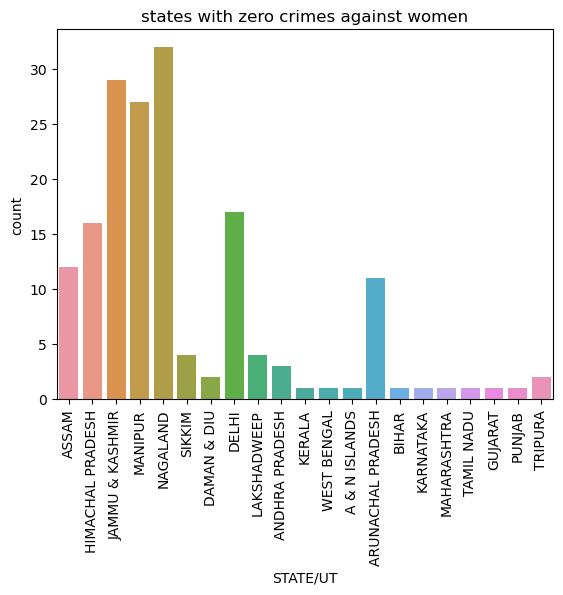

In [15]:
sns.countplot(x=df_zero['STATE/UT'])
plt.title('states with zero crimes against women')
plt.xticks(rotation=90)
plt.show()

State MAGALAND recorded the highest number of reported zero cases of violence against women in its districts in the last decade while states like MAHARASHTRA , KERALA and WEST BENGAL scored the lowest numbers as they have bad records of rape and girls importation and trafficking and State DELHI scored only lower than 20 cases of crimes against women in 10 years which indicates the highest rates of violence in capital especially

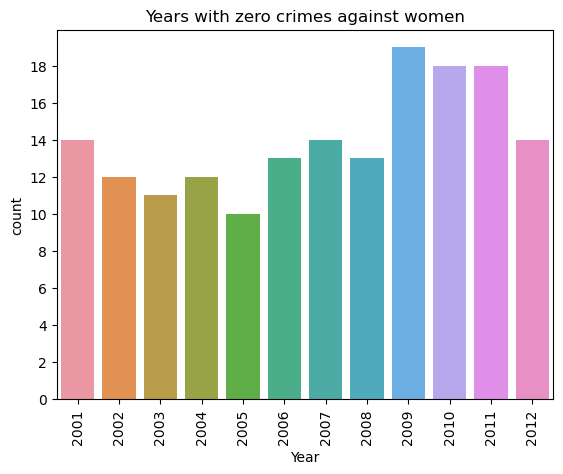

In [18]:
sns.countplot(x=df_zero['Year'])
plt.title('Years with zero crimes against women')
plt.xticks(rotation=90)
plt.yticks(np.arange(0,20,2))
plt.show()

- year 2009 scoored the best record in zero reported cases of cimes in districts of india while 2005 was the lowest which says 2005 was the worst year for women in india in the last decade

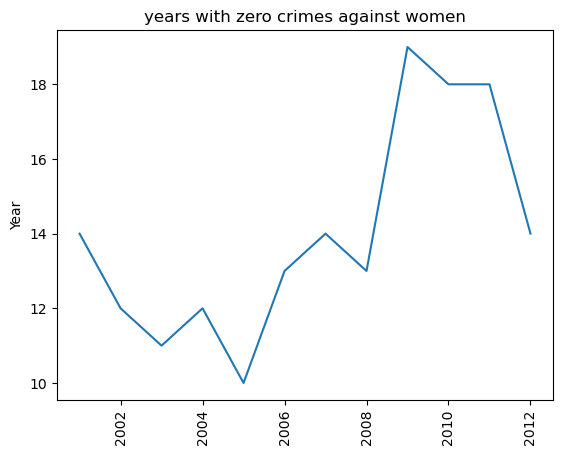

In [19]:
sns.lineplot(data = df_zero['Year'].value_counts())
plt.title('years with zero crimes against women')
plt.xticks(rotation=90)
plt.show()

2005 was the worst year for women in india as it recorded the lowest number of zero cases of crimes against women while 2009 was the best year in its records but still all those statistics are too low and poor for a high populated country like india

In [20]:
#now let us drop dataset we do not need :
df = df.drop(df_zero.index)

In [21]:
df1 = pd.read_csv('/Users/tabrezkhan/Downloads/States data.csv')
df1

STATE/UT  population litercay rate  Area km^2
0       A & N ISLANDS      380581        86.63%       8249
1      ANDHRA PRADESH    84580777        67.02%     162970
2   ARUNACHAL PRADESH     1383727        65.38%      83743
3               ASSAM    31205576        72.19%      78438
4               BIHAR   104099452        61.80%      94163
5          CHANDIGARH     1055450        86.05%        114
6        CHHATTISGARH    25545198        70.28%     135192
7        D & N HAVELI      343709        76.24%        491
8         DAMAN & DIU      243247        87.10%        112
9               DELHI    16787941        86.21%       1483
10                GOA     1458545        88.70%       3702
11            GUJARAT    60439692        78.03%     196244
12            HARYANA    25351462        75.55%      44212
13   HIMACHAL PRADESH     6864602        82.80%      55673
14    JAMMU & KASHMIR    12541302        67.16%      55538
15          JHARKHAND    32988134        66.41%      79716
16          KARNATAKA    61095297        75.36%     191791
17             KERALA    33406061        94.00%      38852
18        LAKSHADWEEP       64473        91.85%         32
19     MADHYA PRADESH    72626809        69.32%     308252
20        MAHARASHTRA   112374333        82.34%     307713
21            MANIPUR     2855794        76.94%      22327
22          MEGHALAYA     2966889        74.43%      22429
23            MIZORAM     1097206        91.33%      21081
24           NAGALAND     1978502        79.55%      16579
25             ODISHA    41974218        72.87%     155707
26         PUDUCHERRY     1247953        85.85%        490
27             PUNJAB    27743338        75.84%      50362
28          RAJASTHAN    68548437        66.11%     342239
29             SIKKIM      610577        81.42%       7096
30         TAMIL NADU    72147030        80.09%     130060
31            TRIPURA     3673917        87.22%      10486
32      UTTAR PRADESH   199812341        67.68%     240928
33        UTTARAKHAND    10086292        78.82%      53483
34        WEST BENGAL    91276115        76.26%      88752

In [22]:
df1['Density'] = df1['population'] / df1['Area km^2']
df1

STATE/UT  population litercay rate  Area km^2       Density
0       A & N ISLANDS      380581        86.63%       8249     46.136623
1      ANDHRA PRADESH    84580777        67.02%     162970    518.995993
2   ARUNACHAL PRADESH     1383727        65.38%      83743     16.523495
3               ASSAM    31205576        72.19%      78438    397.837477
4               BIHAR   104099452        61.80%      94163   1105.523953
5          CHANDIGARH     1055450        86.05%        114   9258.333333
6        CHHATTISGARH    25545198        70.28%     135192    188.954953
7        D & N HAVELI      343709        76.24%        491    700.018330
8         DAMAN & DIU      243247        87.10%        112   2171.848214
9               DELHI    16787941        86.21%       1483  11320.256912
10                GOA     1458545        88.70%       3702    393.988385
11            GUJARAT    60439692        78.03%     196244    307.982369
12            HARYANA    25351462        75.55%      44212    573.406813
13   HIMACHAL PRADESH     6864602        82.80%      55673    123.302175
14    JAMMU & KASHMIR    12541302        67.16%      55538    225.814793
15          JHARKHAND    32988134        66.41%      79716    413.820739
16          KARNATAKA    61095297        75.36%     191791    318.551428
17             KERALA    33406061        94.00%      38852    859.828606
18        LAKSHADWEEP       64473        91.85%         32   2014.781250
19     MADHYA PRADESH    72626809        69.32%     308252    235.608557
20        MAHARASHTRA   112374333        82.34%     307713    365.192023
21            MANIPUR     2855794        76.94%      22327    127.907645
22          MEGHALAYA     2966889        74.43%      22429    132.279148
23            MIZORAM     1097206        91.33%      21081     52.047151
24           NAGALAND     1978502        79.55%      16579    119.337837
25             ODISHA    41974218        72.87%     155707    269.571811
26         PUDUCHERRY     1247953        85.85%        490   2546.842857
27             PUNJAB    27743338        75.84%      50362    550.878400
28          RAJASTHAN    68548437        66.11%     342239    200.294055
29             SIKKIM      610577        81.42%       7096     86.045237
30         TAMIL NADU    72147030        80.09%     130060    554.721129
31            TRIPURA     3673917        87.22%      10486    350.364009
32      UTTAR PRADESH   199812341        67.68%     240928    829.344622
33        UTTARAKHAND    10086292        78.82%      53483    188.588748
34        WEST BENGAL    91276115        76.26%      88752   1028.440091

In [23]:
df['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'PUDUCHERRY', 'LAKSHADWEEP'], dtype=object)

In [24]:
df1['STATE/UT'].unique()

array(['A & N ISLANDS', 'ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM',
       'BIHAR', 'CHANDIGARH', 'CHHATTISGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'GOA', 'GUJARAT', 'HARYANA',
       'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA',
       'KERALA', 'LAKSHADWEEP', 'MADHYA PRADESH', 'MAHARASHTRA',
       'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'ODISHA',
       'PUDUCHERRY', 'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMIL NADU',
       'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL'],
      dtype=object)

In [26]:
# now let us merge both of datasets :
dff = pd.merge(df,df1, on='STATE/UT',how='right') #how = 'right' we will locate df1 on the right of data
dff

STATE/UT         DISTRICT  Year  Rape  Kidnapping and Abduction  \
0     A & N ISLANDS          ANDAMAN  2001     3                         2   
1     A & N ISLANDS          NICOBAR  2001     0                         0   
2     A & N ISLANDS          ANDAMAN  2002     1                         1   
3     A & N ISLANDS          NICOBAR  2002     1                         0   
4     A & N ISLANDS          ANDAMAN  2003     2                         2   
...             ...              ...   ...   ...                       ...   
8436    WEST BENGAL          PURULIA  2012    50                        34   
8437    WEST BENGAL   SEALDAH G.R.P.  2012     0                         5   
8438    WEST BENGAL  SILIGURI G.R.P.  2012     0                         3   
8439    WEST BENGAL      SILIGURI_PC  2012    21                       111   
8440    WEST BENGAL   UTTAR DINAJPUR  2012    92                       258   

      Dowry Deaths  Assault on women with intent to outrage her modesty  \
0                0                                                 18     
1                0                                                  1     
2                0                                                 16     
3                0                                                  1     
4                0                                                  9     
...            ...                                                ...     
8436            12                                                 64     
8437             1                                                 14     
8438             1                                                  8     
8439             3                                                 35     
8440             9                                                150     

      Insult to modesty of Women  Cruelty by Husband or his Relatives  \
0                              1                                    9   
1                              0                                    0   
2                              3                                    4   
3                              0                                    0   
4                              2                                    7   
...                          ...                                  ...   
8436                           0                                  206   
8437                           2                                    0   
8438                           1                                    0   
8439                          12                                  370   
8440                           5                                  623   

      Importation of Girls  total crimes  population litercay rate  Area km^2  \
0                        0            33      380581        86.63%       8249   
1                        0             1      380581        86.63%       8249   
2                        0            25      380581        86.63%       8249   
3                        0             2      380581        86.63%       8249   
4                        0            22      380581        86.63%       8249   
...                    ...           ...         ...           ...        ...   
8436                     0           366    91276115        76.26%      88752   
8437                     0            22    91276115        76.26%      88752   
8438                     0            13    91276115        76.26%      88752   
8439                     0           552    91276115        76.26%      88752   
8440                     0          1137    91276115        76.26%      88752   

          Density  
0       46.136623  
1       46.136623  
2       46.136623  
3       46.136623  
4       46.136623  
...           ...  
8436  1028.440091  
8437  1028.440091  
8438  1028.440091  
8439  1028.440091  
8440  1028.440091  

[8441 rows x 15 columns]

In [27]:
dff.isnull().sum()

STATE/UT                                               0
DISTRICT                                               0
Year                                                   0
Rape                                                   0
Kidnapping and Abduction                               0
Dowry Deaths                                           0
Assault on women with intent to outrage her modesty    0
Insult to modesty of Women                             0
Cruelty by Husband or his Relatives                    0
Importation of Girls                                   0
total crimes                                           0
population                                             0
litercay rate                                          0
Area km^2                                              0
Density                                                0
dtype: int64

our keys of merge are applied so there are no null values and our data are clean so we can move ahead

# 2.1 Analysis of Literacy Rate vs Total Crimes

# We will indicate the summury of litercay rate based on year 2011 as we collect data based on the last census commissioner's data of 2011 as we collected data of year 2011 which is based the accumulative previous year so we will indicate our results based on year 2011 as it is the last year before making the last report of collected dataset

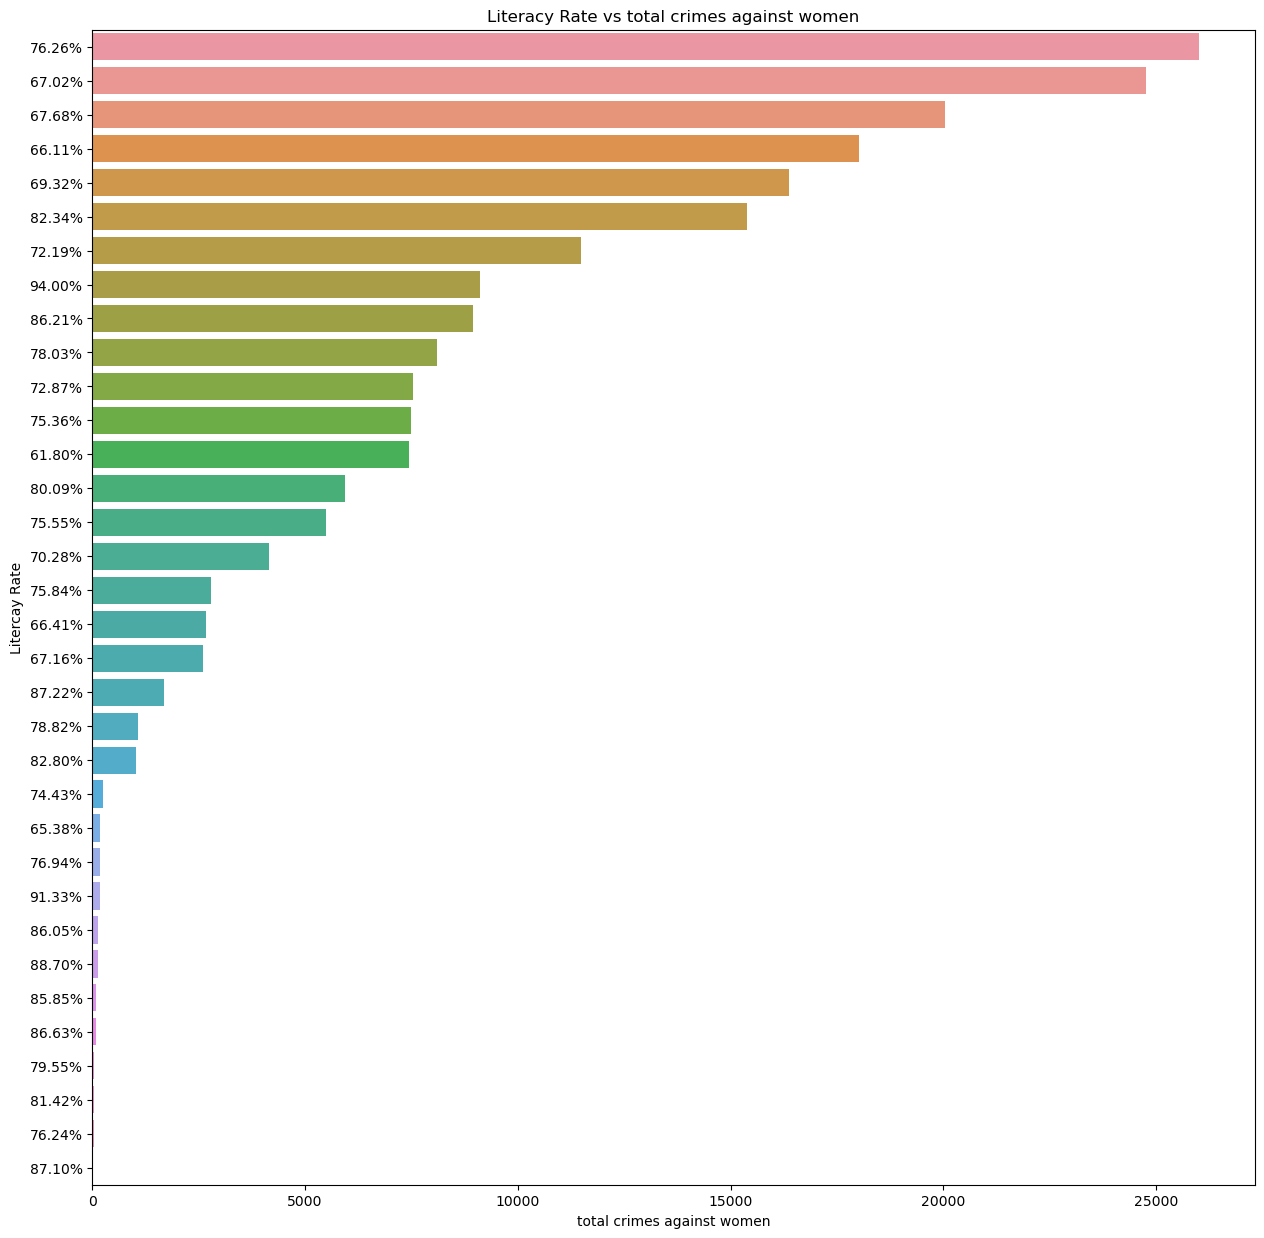

In [28]:
plt.figure(figsize=(15,15))
data = dff[dff['Year'] == 2010]
dt = data.groupby('litercay rate')['total crimes'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='total crimes' , y='litercay rate' , data=dt)
plt.title('Literacy Rate vs total crimes against women')
plt.xlabel('total crimes against women')
plt.ylabel('Litercay Rate')
plt.show()

- according to 2011 statistics population with literacy rate 76.16 % scored the highest number of crimes against woman and we notice societies with high literacy ratee like 94% , 86.11 % commiitted more than 5000 crimes in districts in 2011 which is si high for a high literated population in one year
- violence against women is widespread against women regardless of education level

# 2.2 Analysis of the type of crime vs each state vs Literacy rate

# Literacy rate vs each type of crimes

In [29]:
dff.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls', 'total crimes', 'population', 'litercay rate',
       'Area km^2', 'Density'],
      dtype='object')

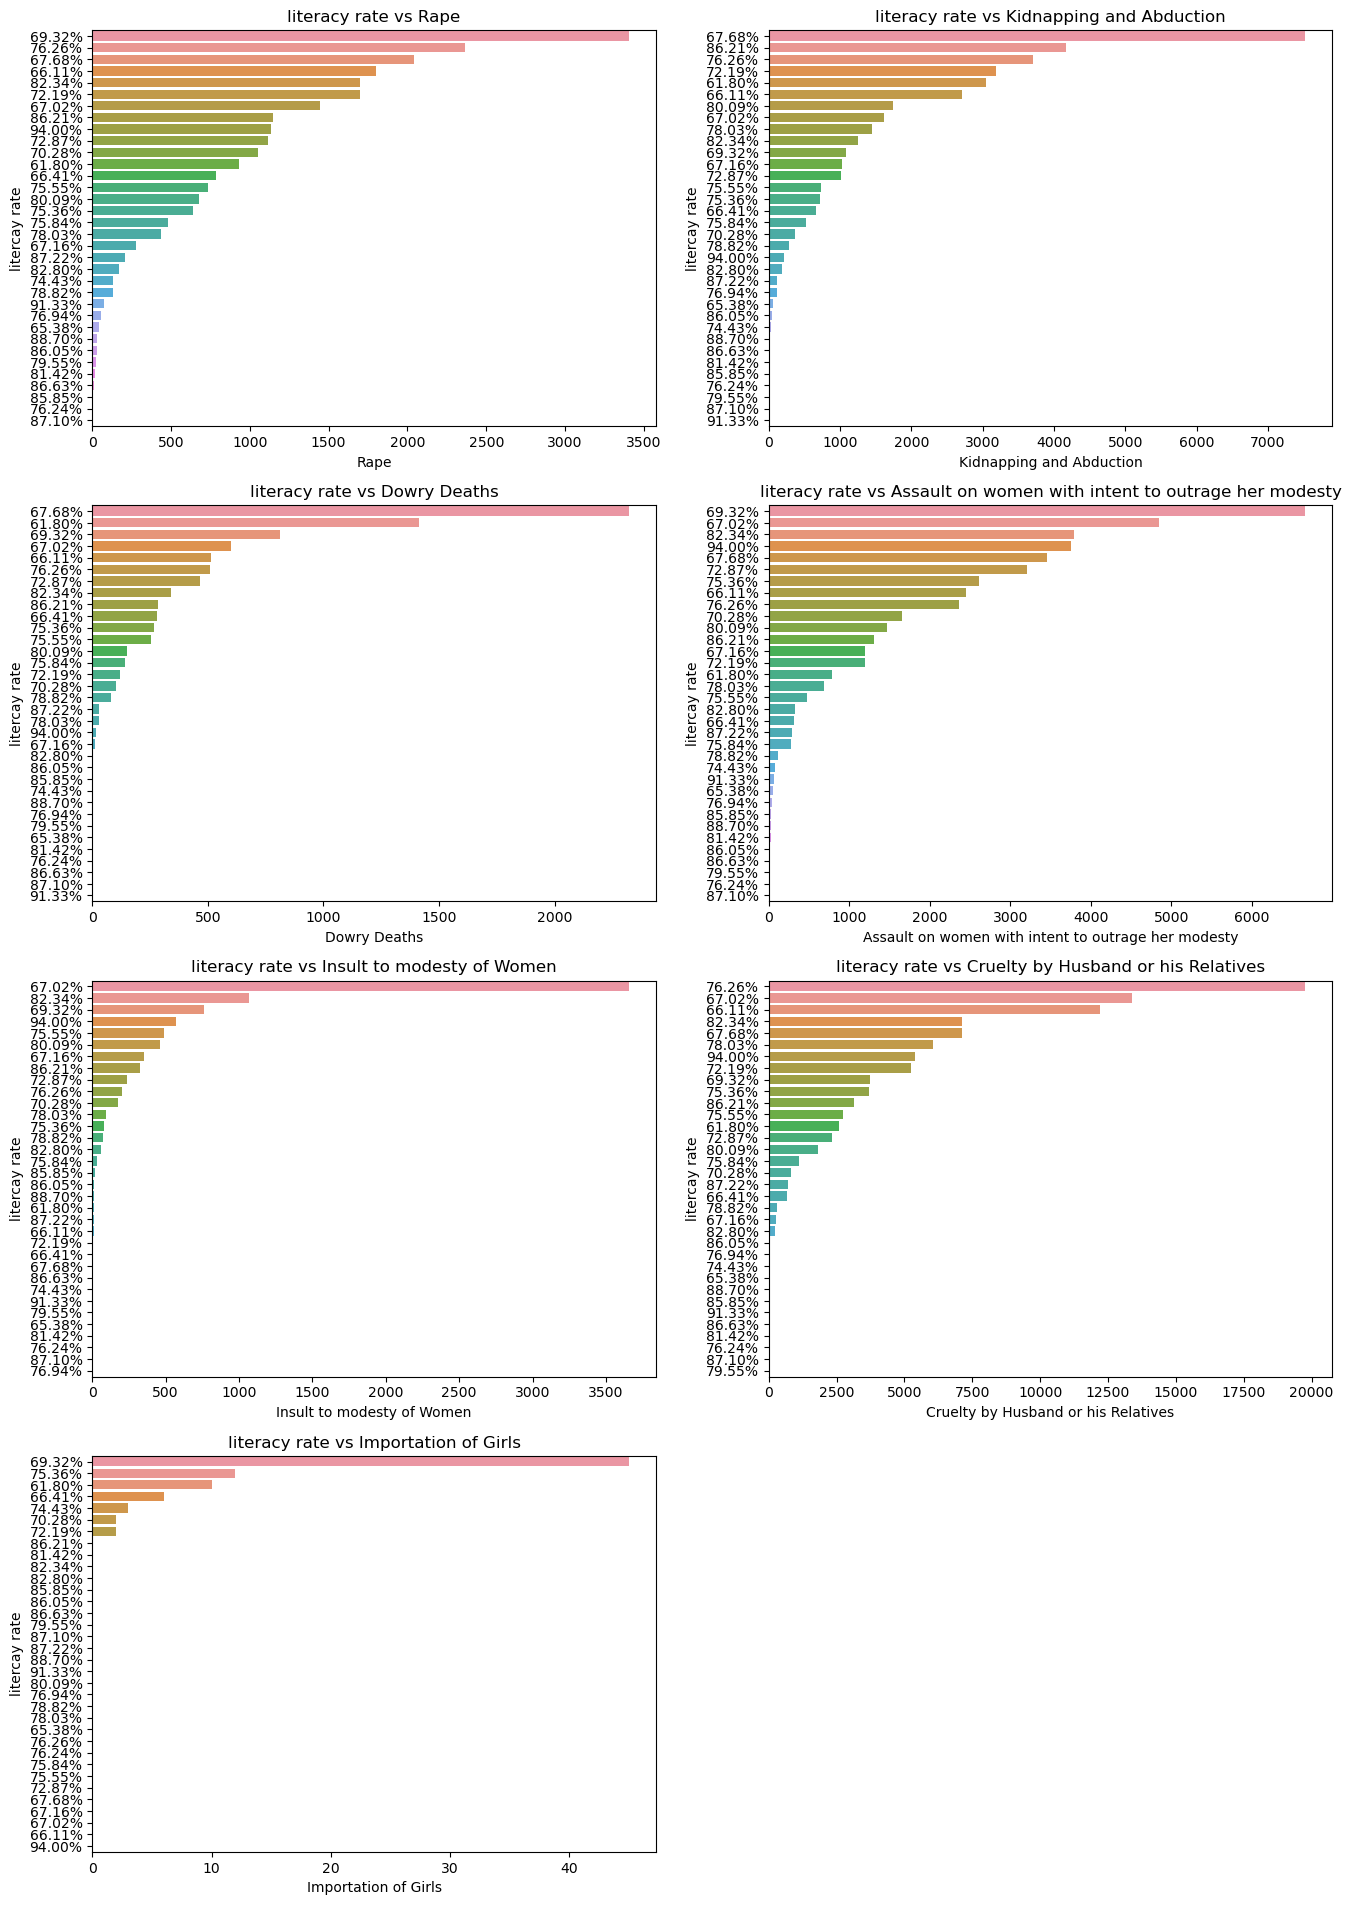

In [31]:
plt.figure(figsize=(16,36))
plot = 1
data = dff[dff['Year'] == 2011]
cols = ['Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls']
for i in cols :
    if plot <= 7 :
        ax = plt.subplot(6,2,plot)
        dtt = data.groupby('litercay rate')[i].sum().sort_values(ascending=False).reset_index()
        sns.barplot(x=dtt[i] , y=dtt['litercay rate'] , data = dtt)
        plt.title('literacy rate vs {}'.format(i))
    plot +=1
plt.show()    

- according to 2011 populations with moderate literacy rates committed the highest number of cases in all types of crimes against women so we see population with literacy rate of 36.32 5 committed the highest number of recorded crimes of Rape ,Assault on women with intent to outrage her modesty and importation of girls and population with literacy rate of 86.68 % committed the highest number of kidnapping , abduction and Dowery Death crimes while insult to modesty of women happened mostly in population with literacy rate of 67.02 %
- Domestic violence crimes in 2011 were recorded highly in a population with litercay rate of 76.26 % which is considered as high literacy rate mostly 
- crimes against women in 2011 recorded the lowest numbers in highly literated societies above 85 %

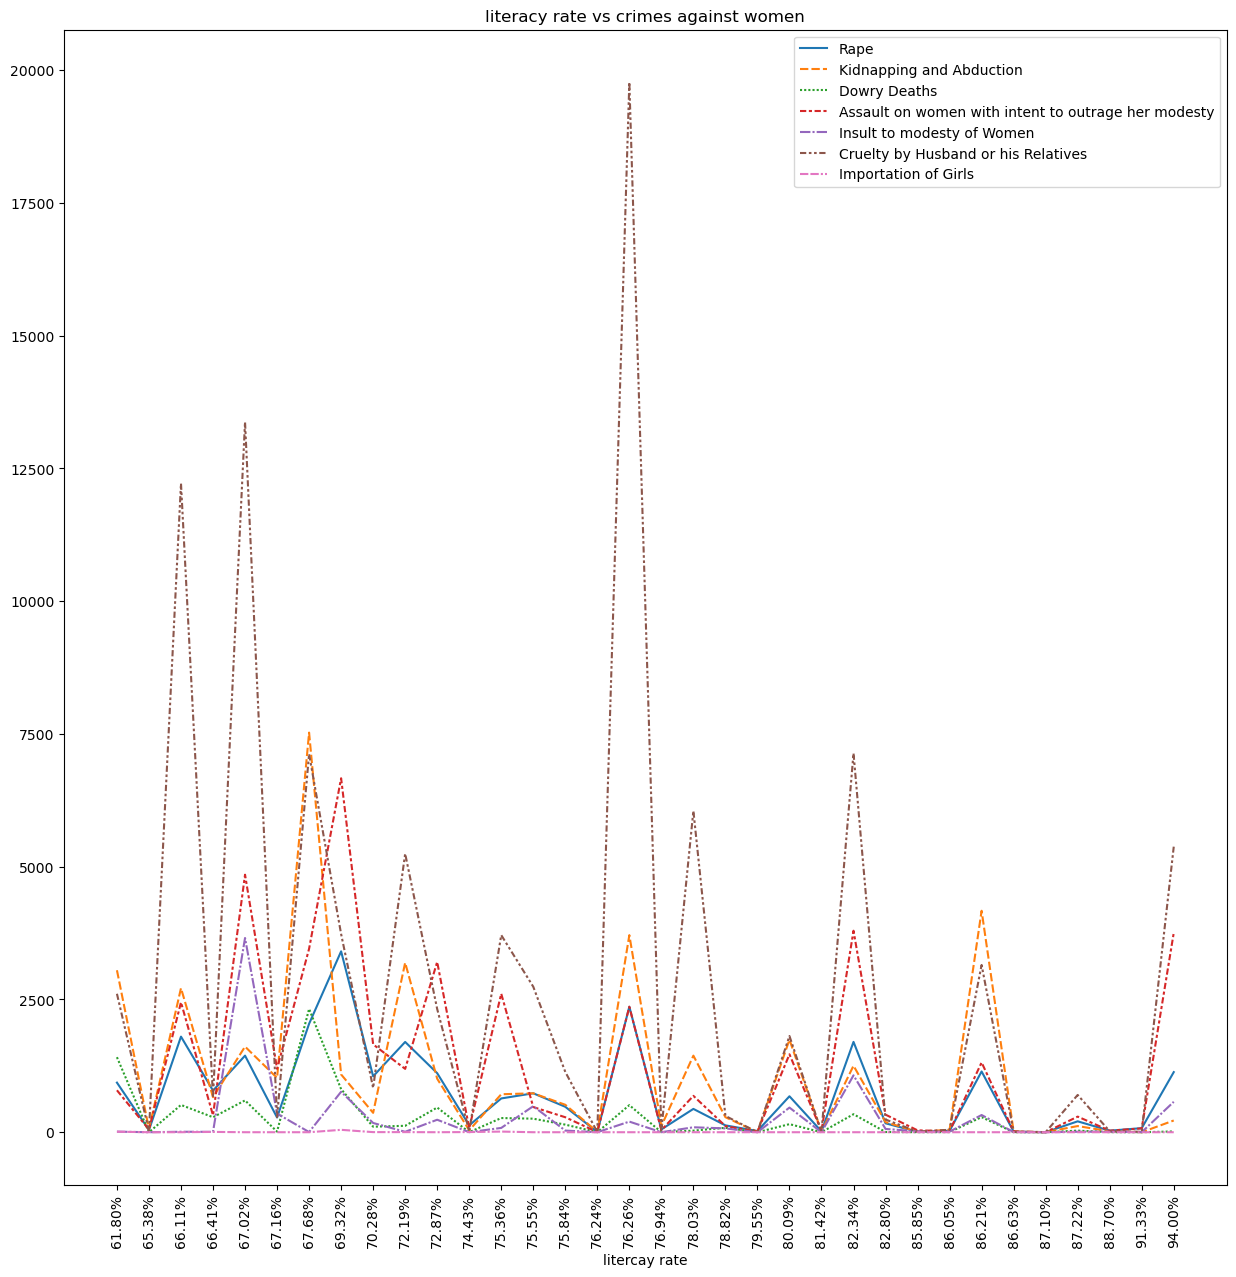

In [37]:
plt.figure(figsize=(15,15))
data = dff[dff['Year'] == 2011]
dt = data.groupby('litercay rate')[['Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls']].sum()
sns.lineplot(data = dt)
plt.title('literacy rate vs crimes against women')
plt.xticks(rotation = 90)
plt.show()

year 2011 recorded Domestic violence against women by mre than 18000 cases in one year as the highest number of types of crimes committed against women while Kidnapping and Abduction crimes recorded the second highest number of crimes while Assault on women with intent were the least

# type of crime vs each state

# we will indicated total number of crimes' cases along all years

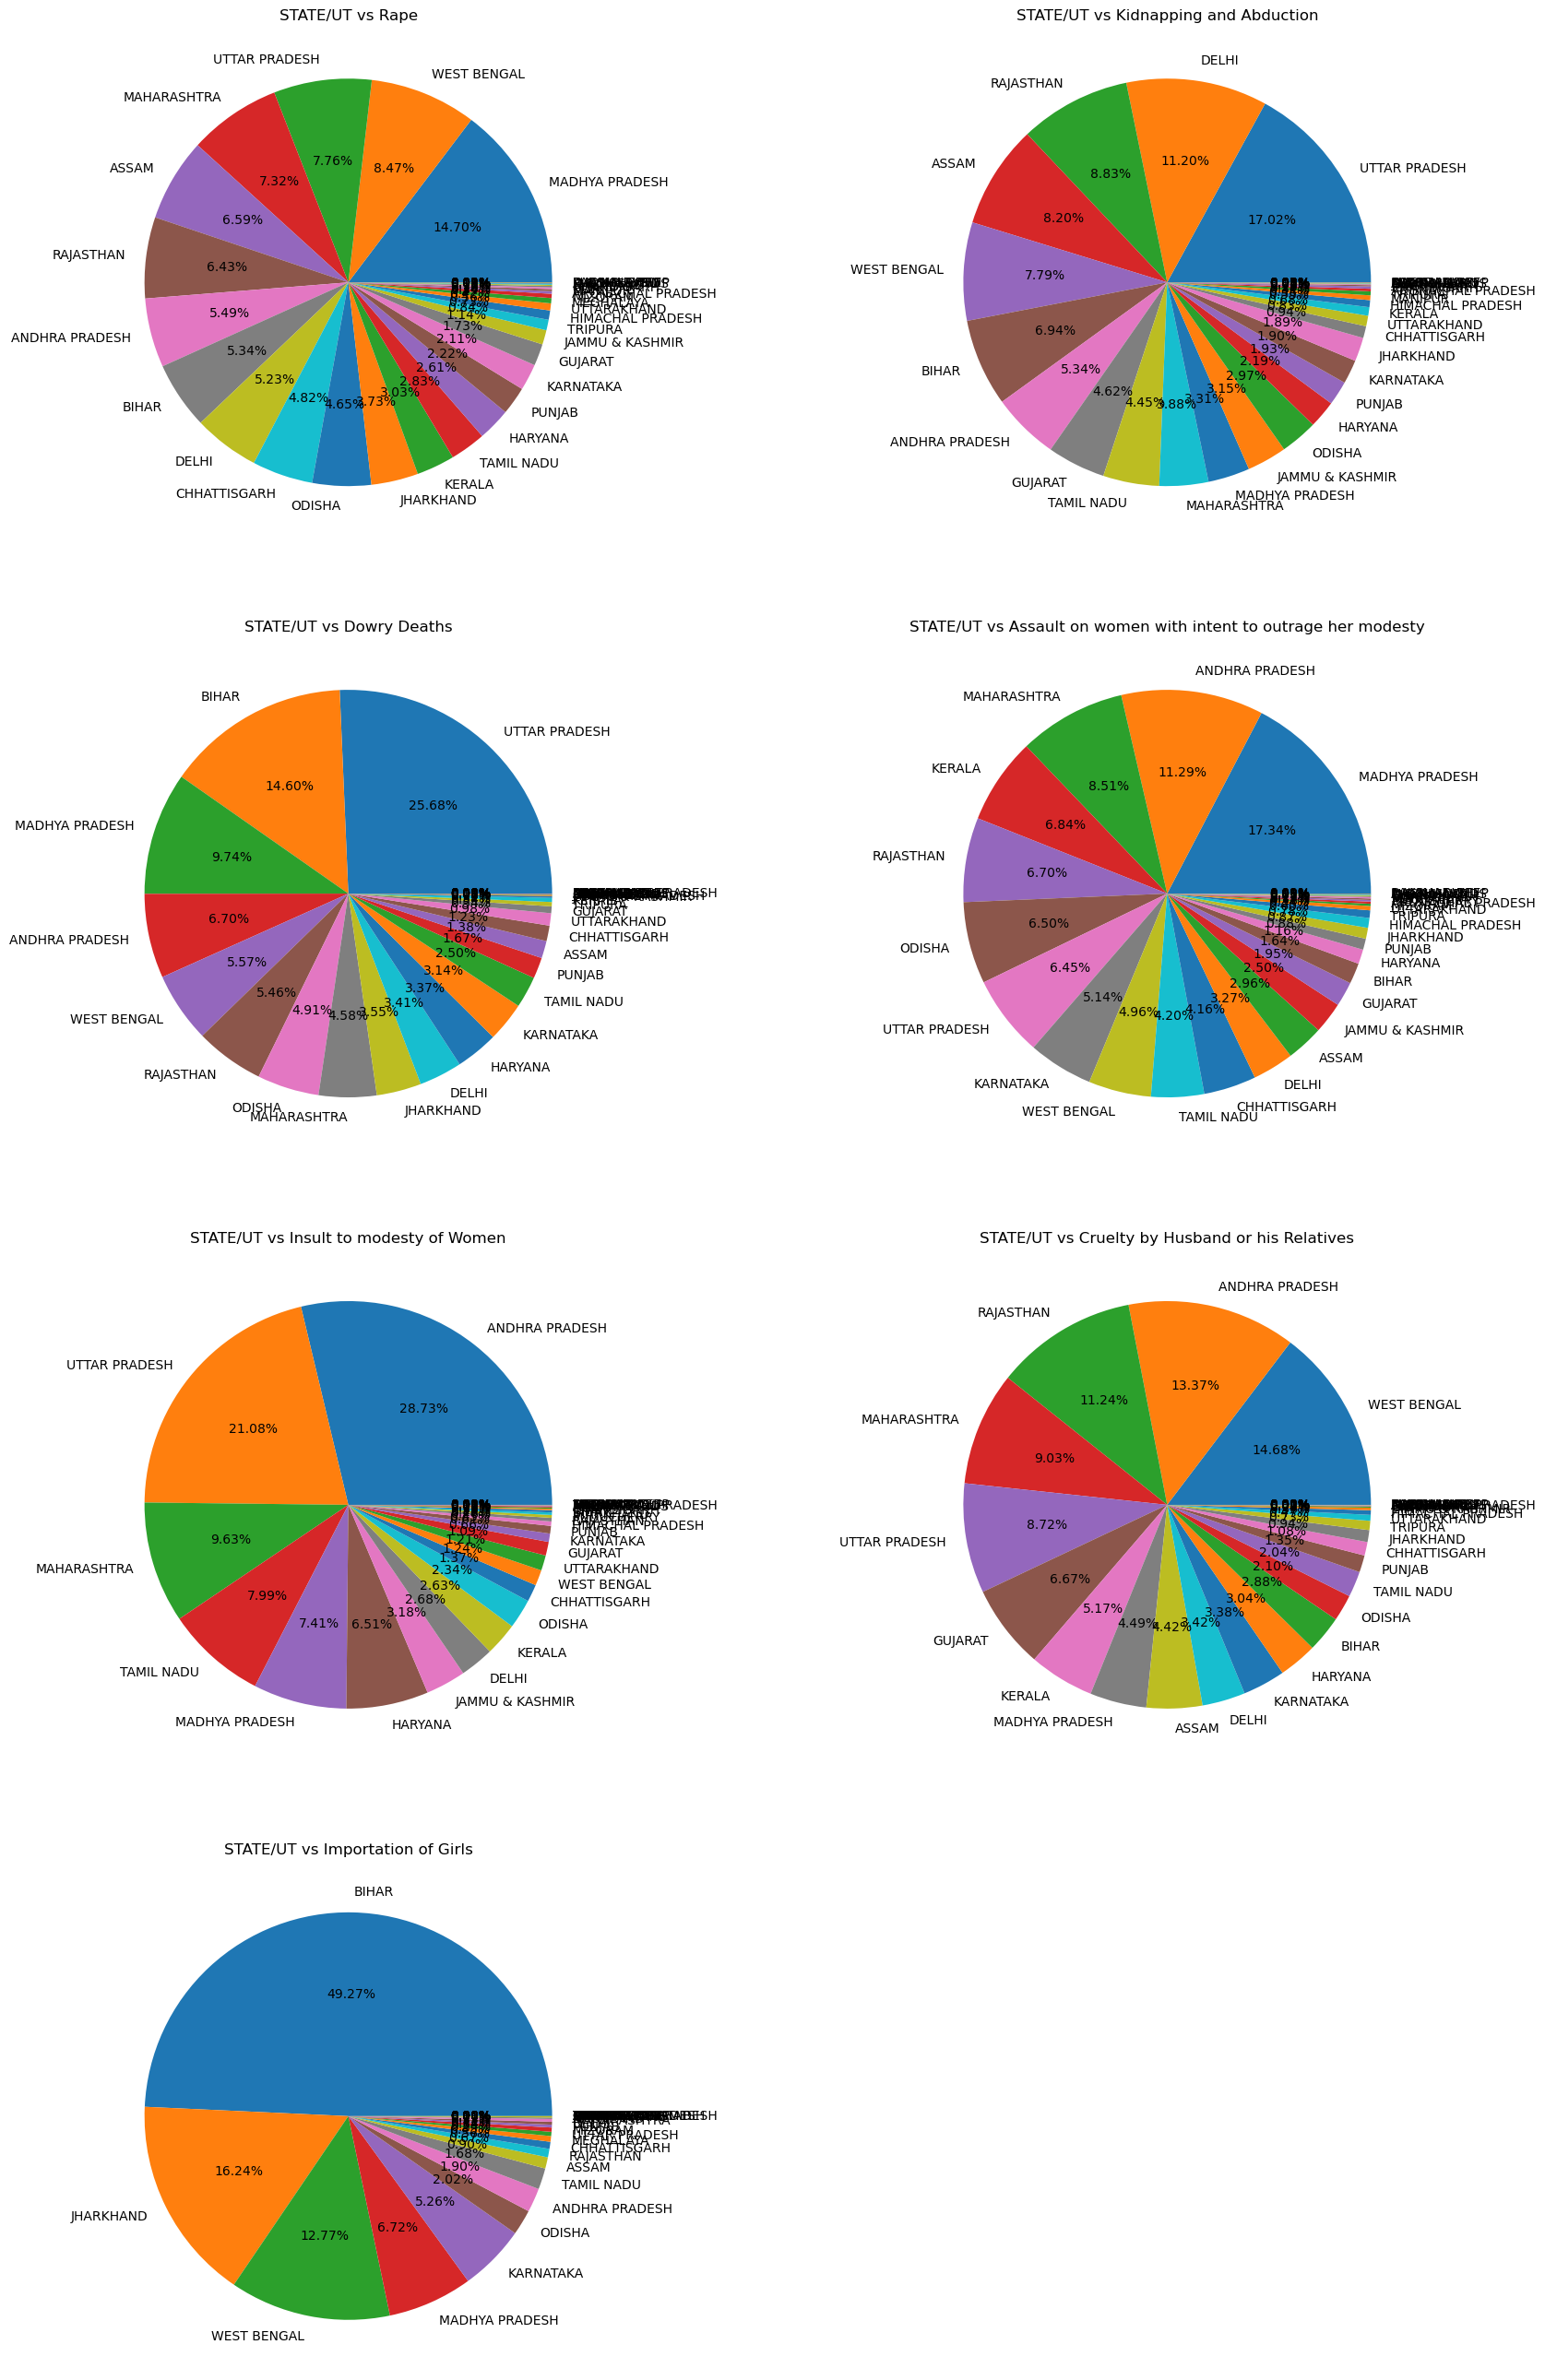

In [45]:
plt.figure(figsize=(21,33))
plot = 1
cols = ['Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls']
for i in cols :
    if plot <= 7 :
        ax = plt.subplot(4,2,plot)
        dtt = dff.groupby('STATE/UT')[i].sum().sort_values(ascending=False).reset_index()
        plt.pie(x=dtt[i] , labels=dtt['STATE/UT'], autopct='%0.2f%%')
        plt.title('STATE/UT vs {}'.format(i))
    plot +=1
plt.show()    

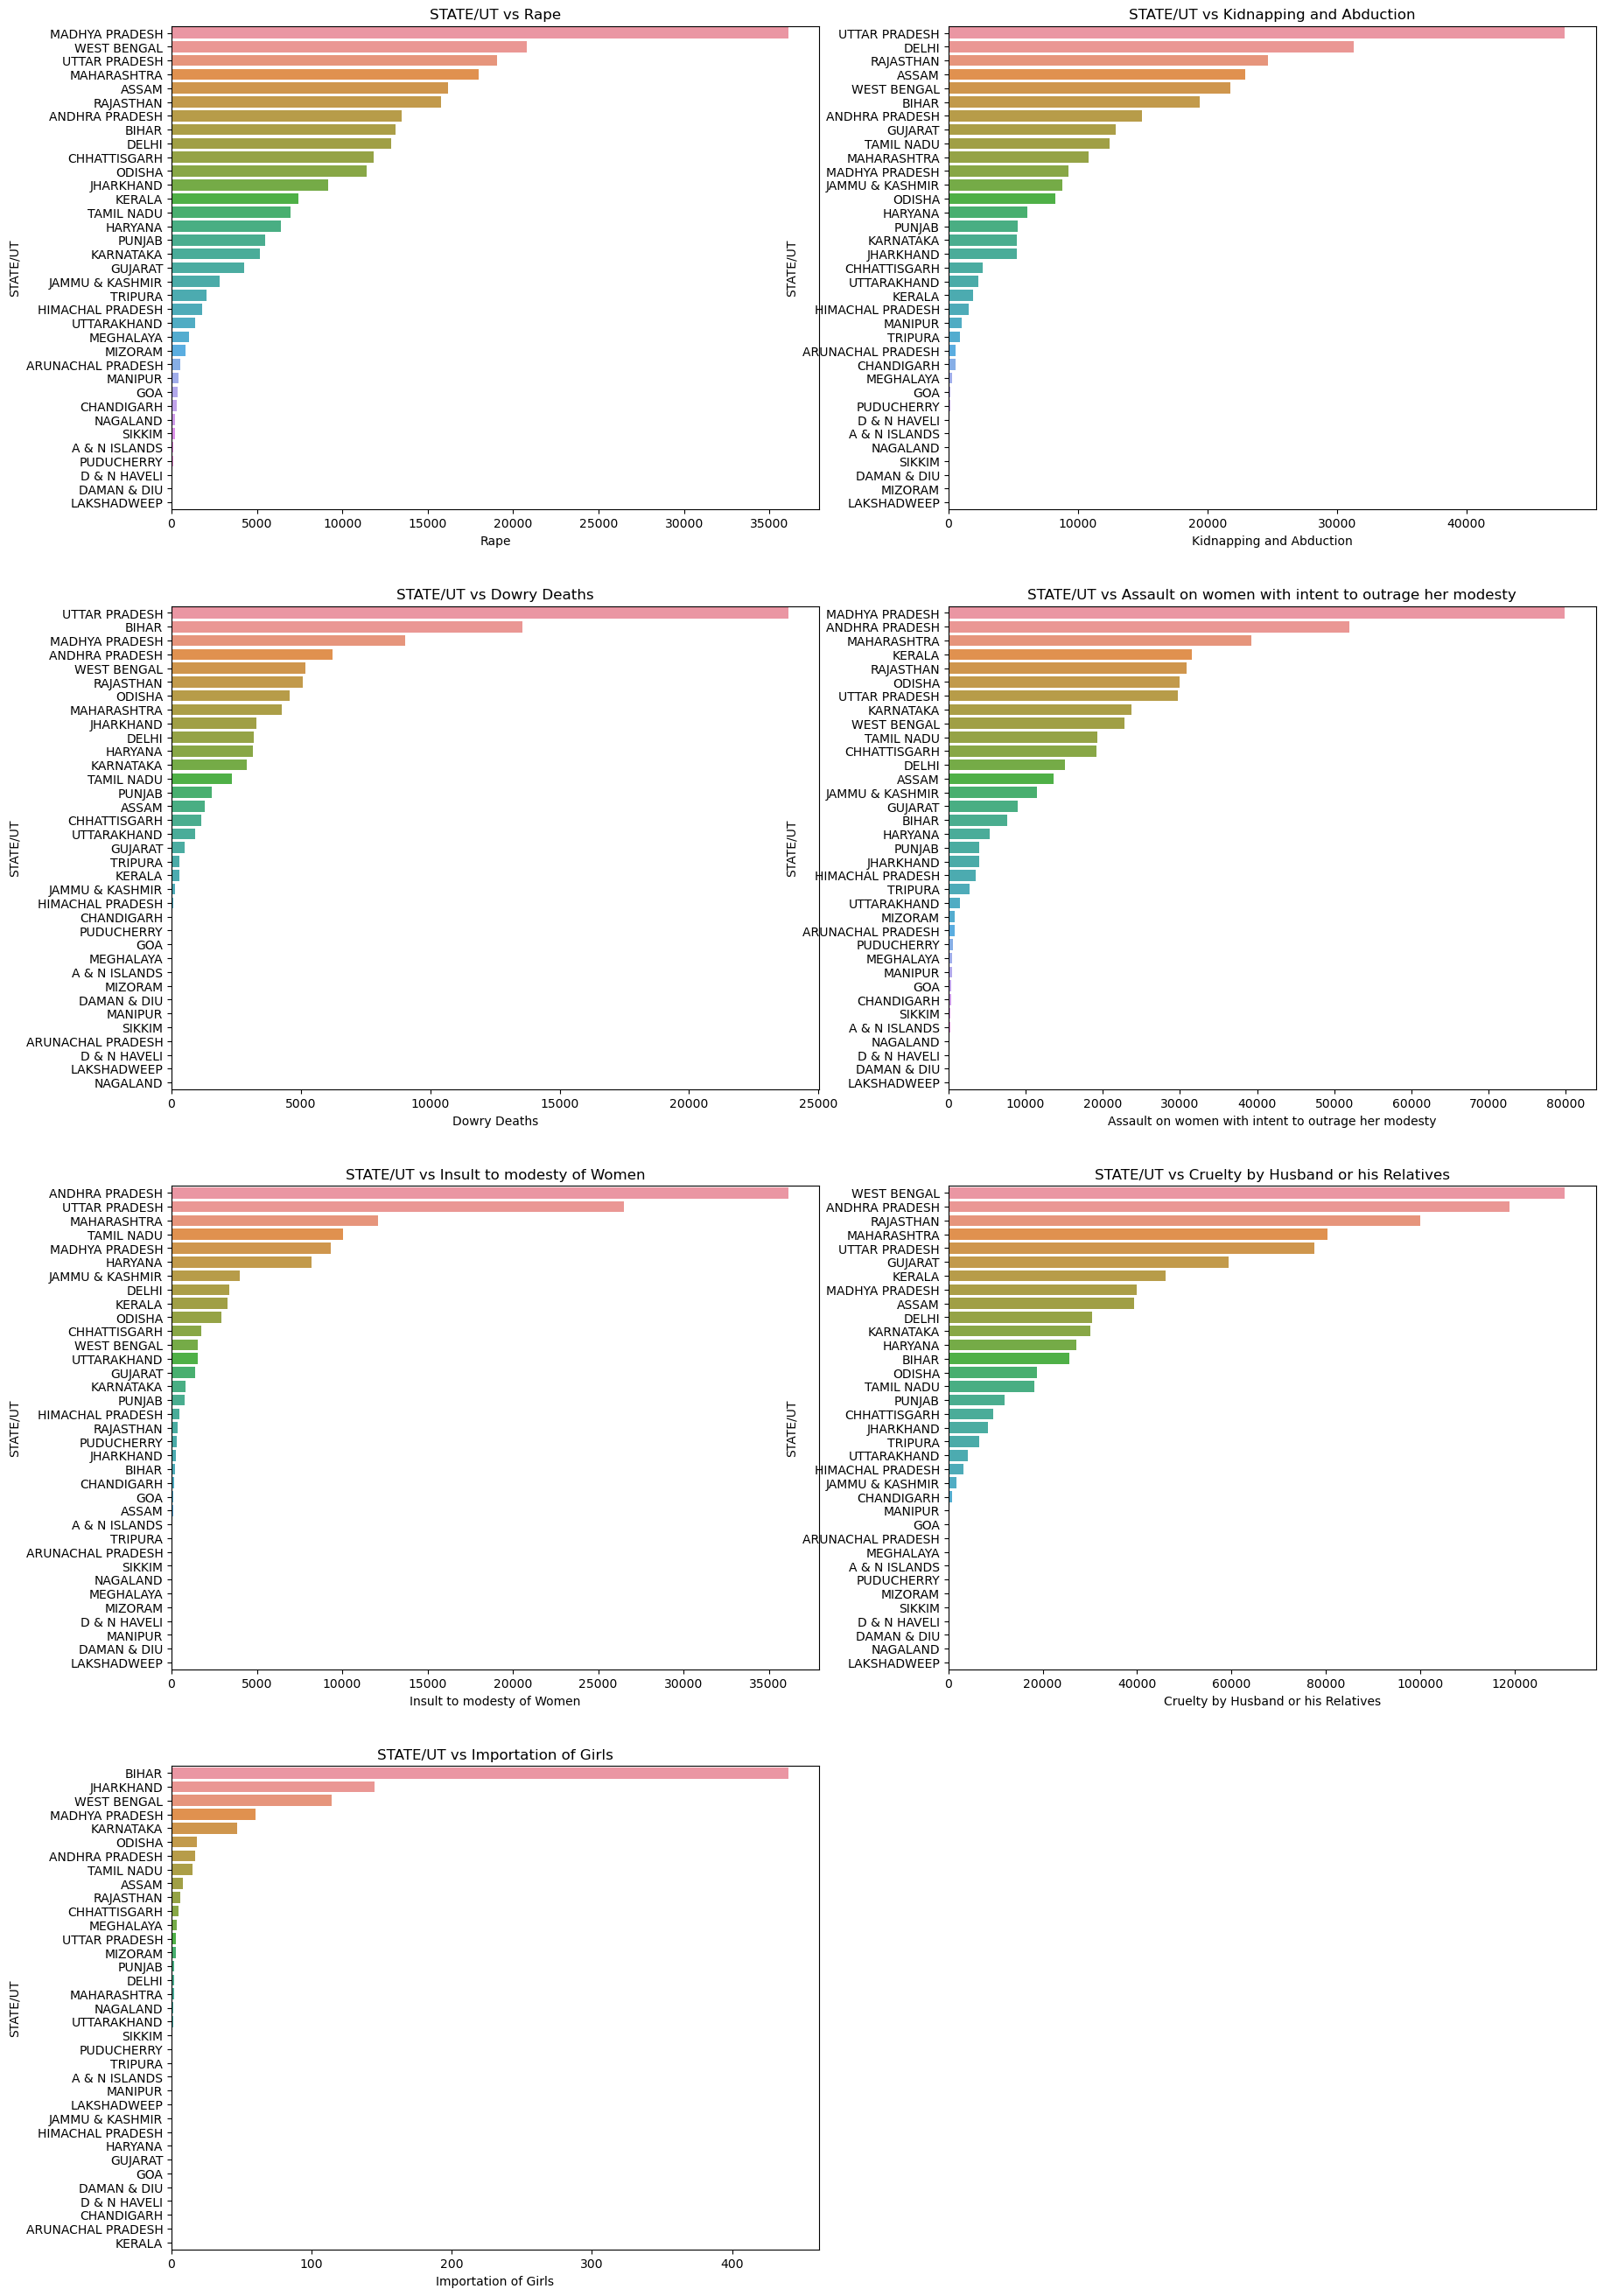

In [44]:
plt.figure(figsize=(21,33))
plot = 1
cols = ['Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls']
for i in cols :
    if plot <= 7 :
        ax = plt.subplot(4,2,plot)
        dtt = dff.groupby('STATE/UT')[i].sum().sort_values(ascending=False).reset_index()
        sns.barplot(x=dtt[i] , y=dtt['STATE/UT'] , data = dtt)
        plt.title('STATE/UT vs {}'.format(i))
    plot +=1
plt.show()    

- state UTTAR PRADESH recorded the highest number of recrded crimes of KIDNAPPING AND ABDUCTION and DOWRY DEATH
- state MADHYA PRADESH recorded the highest number of crimes of Assault on women with intent and RAPE
- state ANDHRA PRADESH recorded the highest number of cases of insult to modesty of women
- WEST BENGAL recorded the highest number of domestic violent against women in the last decade while state BIHAR is the highest in numbers of importation and trafficking of women
- states UTTAR PRADESH , MADHYA PRADESH and BIHAR are the top worst three states for women regardless of any statistics as the types of crimes they recorded highly KIDNAPPING , RAPE and IMPORTATION are the worst ever and most devastating to be commit against women so that is why they are not safe for women t live in them at all
- state LAKSHADWEEP recorded the least statistics in all types of crimes against women in india except Importation of girls so it could be considered the best state in kinda od security

# proportion of types of crimes against women

In [49]:
prop = dff[['Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls']].sum()
prop

Rape                                                   245561
Kidnapping and Abduction                               279557
Dowry Deaths                                            92784
Assault on women with intent to outrage her modesty    460689
Insult to modesty of Women                             125741
Cruelty by Husband or his Relatives                    890412
Importation of Girls                                      893
dtype: int64

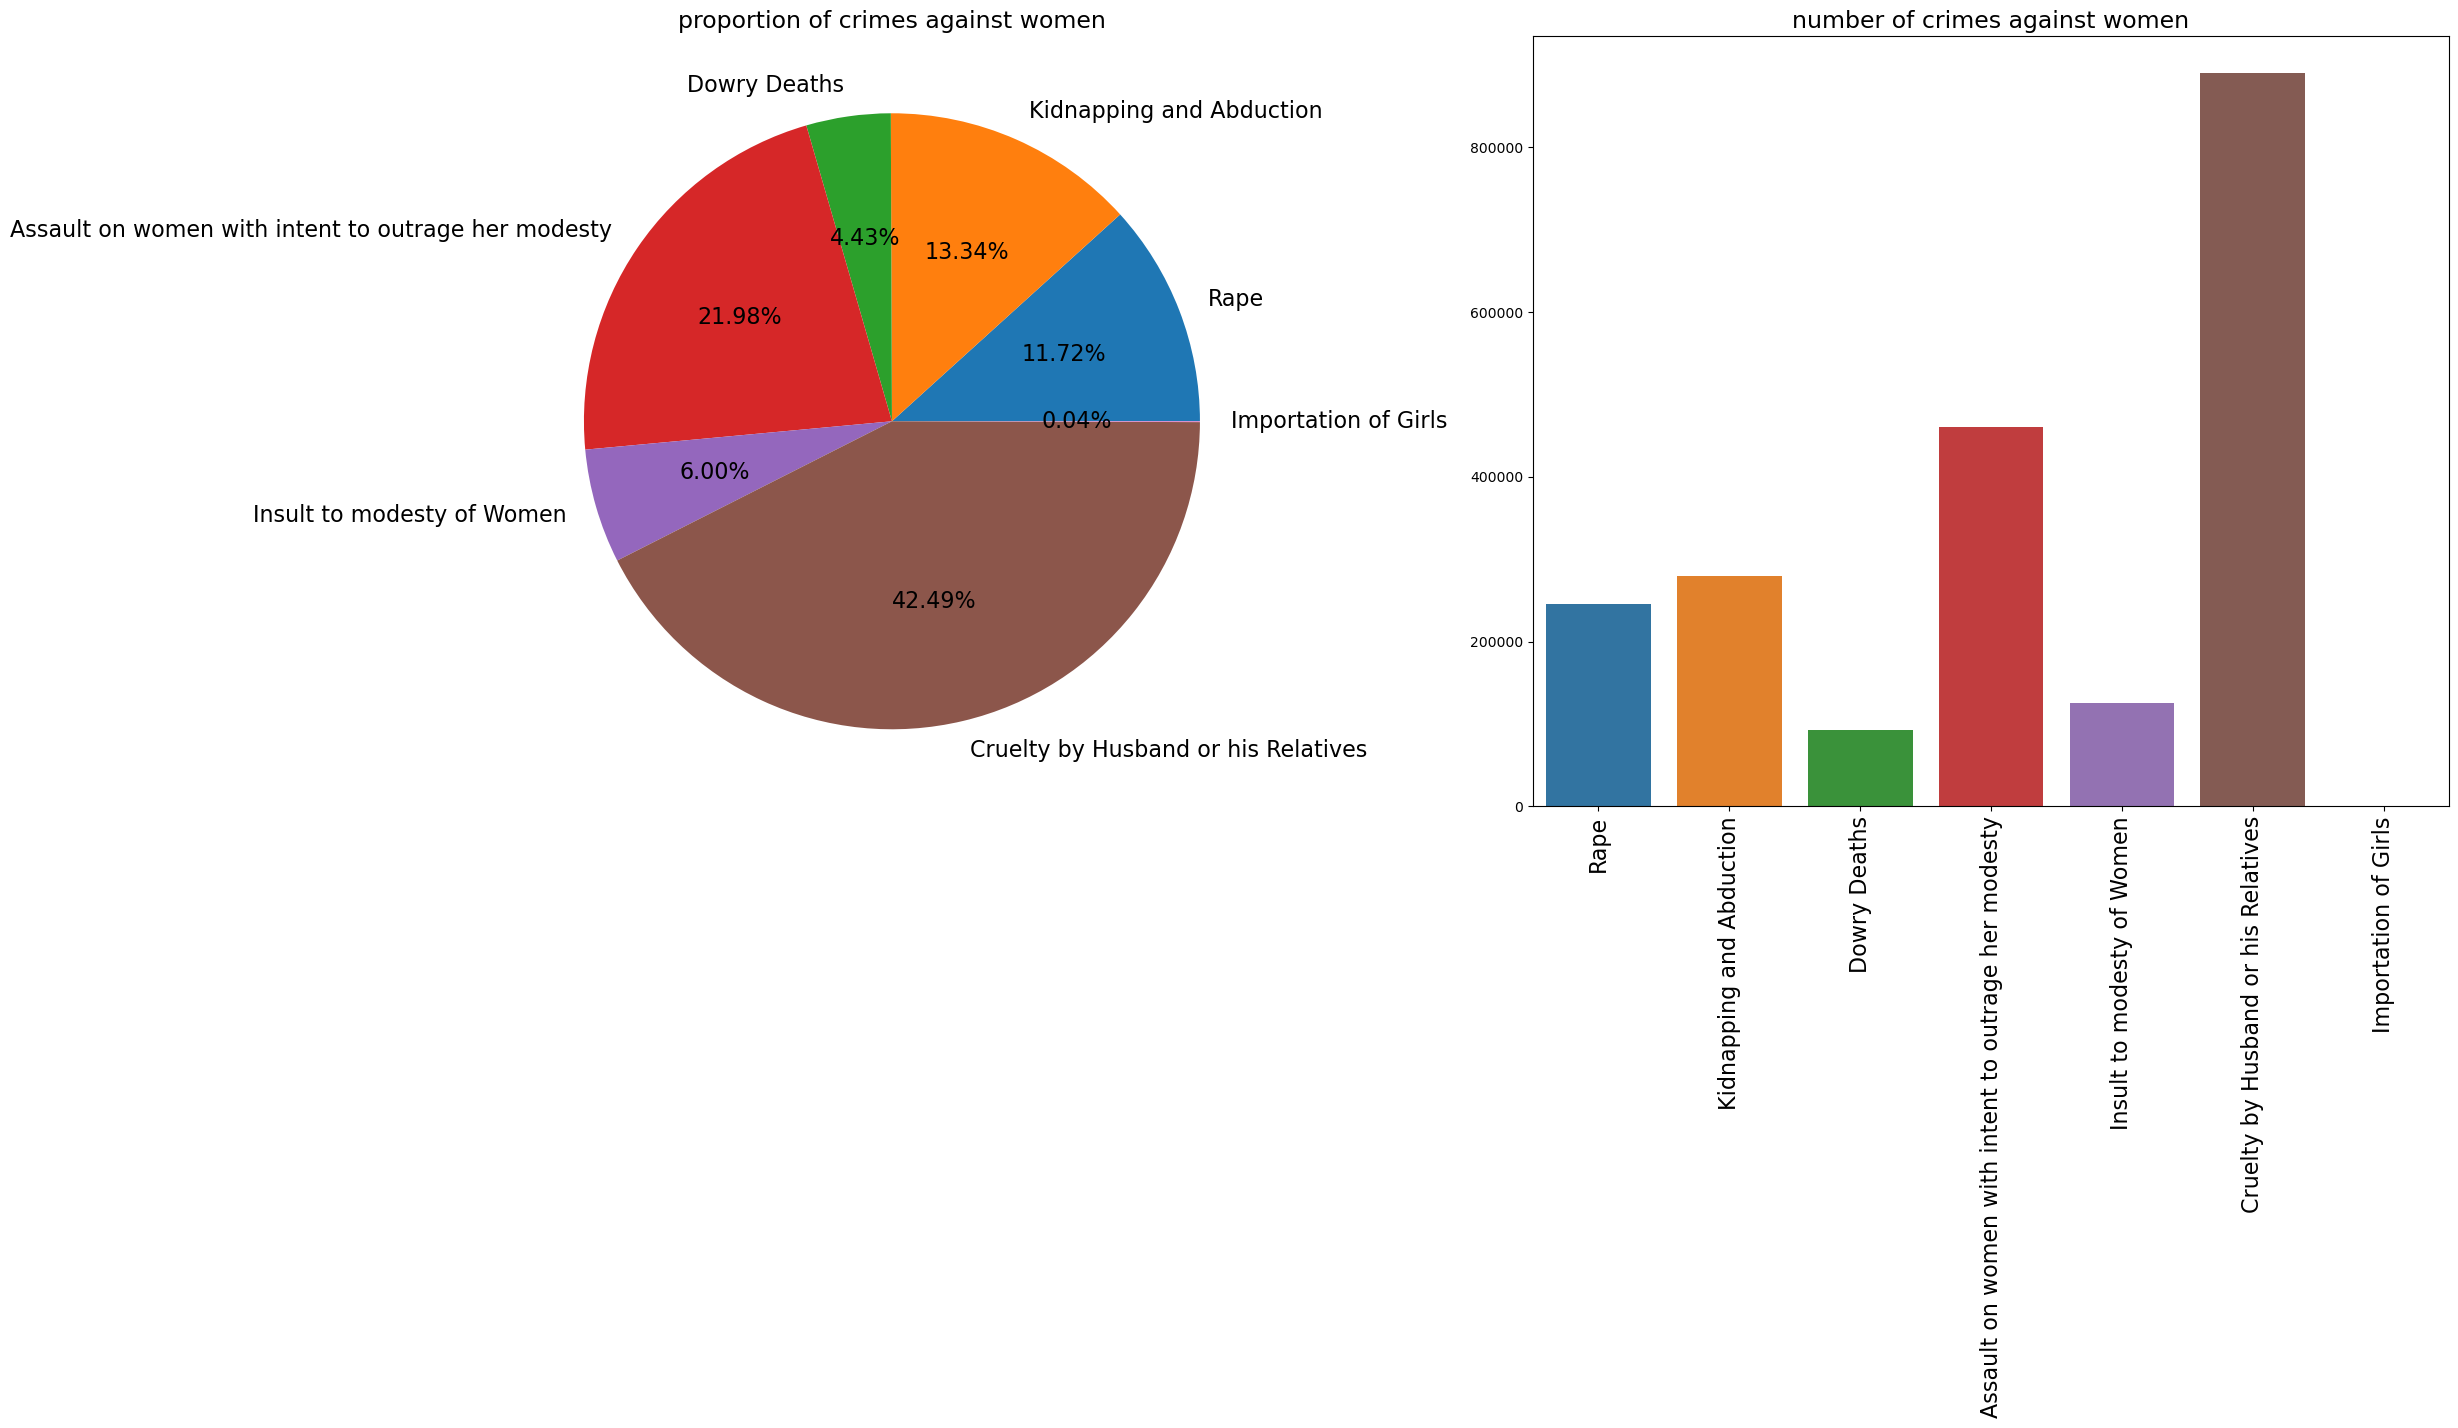

In [54]:
figure , axx = plt.subplots(1,2,figsize=(26,10))
sns.barplot(x=prop.index , y=prop.values , ax=axx[1])
axx[1].set_title('number of crimes against women',fontsize=17)
plt.xticks(rotation=90 , fontsize=16)

prop.plot(kind='pie' , autopct='%0.2f%%' ,ax=axx[0] , fontsize=16)
axx[0].set_title('proportion of crimes against women',fontsize=17)
plt.show()

Cruelty by Husbands and relatives are the most committed ciolent crimes against women in the last decade in india while assault on wmen with intent to outrage her modesty came in the second place and crimes of importations of girls are the lowest committed

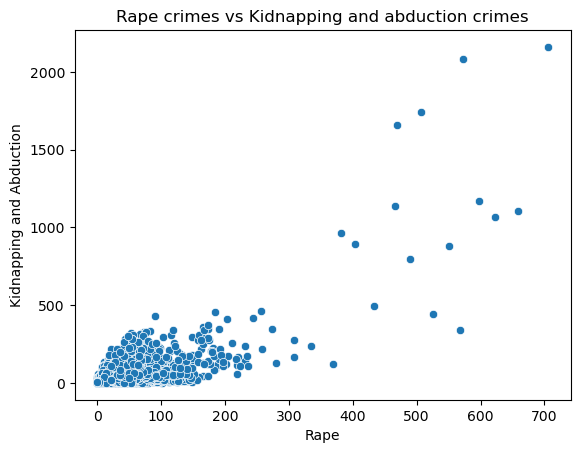

In [56]:
sns.scatterplot(x=dff['Rape'] , y=dff['Kidnapping and Abduction'])
plt.title('Rape crimes vs Kidnapping and abduction crimes')
plt.show()

There is a positive relation between kidnapping and rape crimes as the more kidnapping crimes increas the more rape crimes are committed

# states vs overall crimes

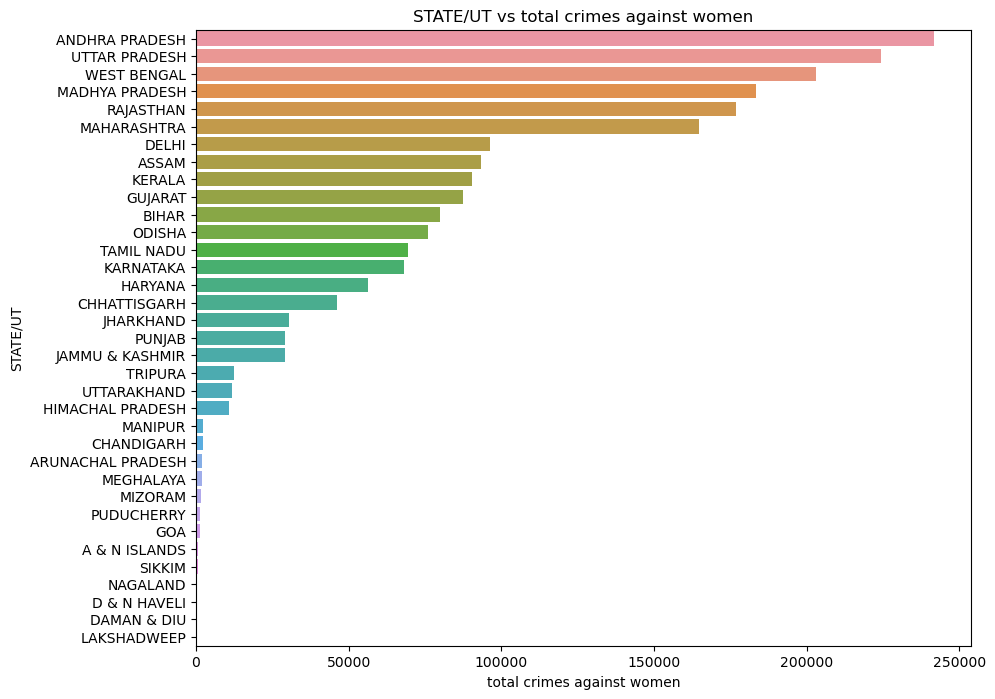

In [63]:
plt.figure(figsize=(10,8))
dt = dff.groupby('STATE/UT')['total crimes'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='total crimes' , y='STATE/UT' , data=dt)
plt.title('STATE/UT vs total crimes against women')
plt.xlabel('total crimes against women')
plt.ylabel('STATE/UT')
plt.show()

- ANDHRA PRADESH  recrded the highest number of crimes against women in india in the last decade
- states WEST BENGAL , ANDHRA PRADESH and UTTAR PRADESH are the most dangerous states on women in india
- states LAKSHADWEEP the most safe states for women

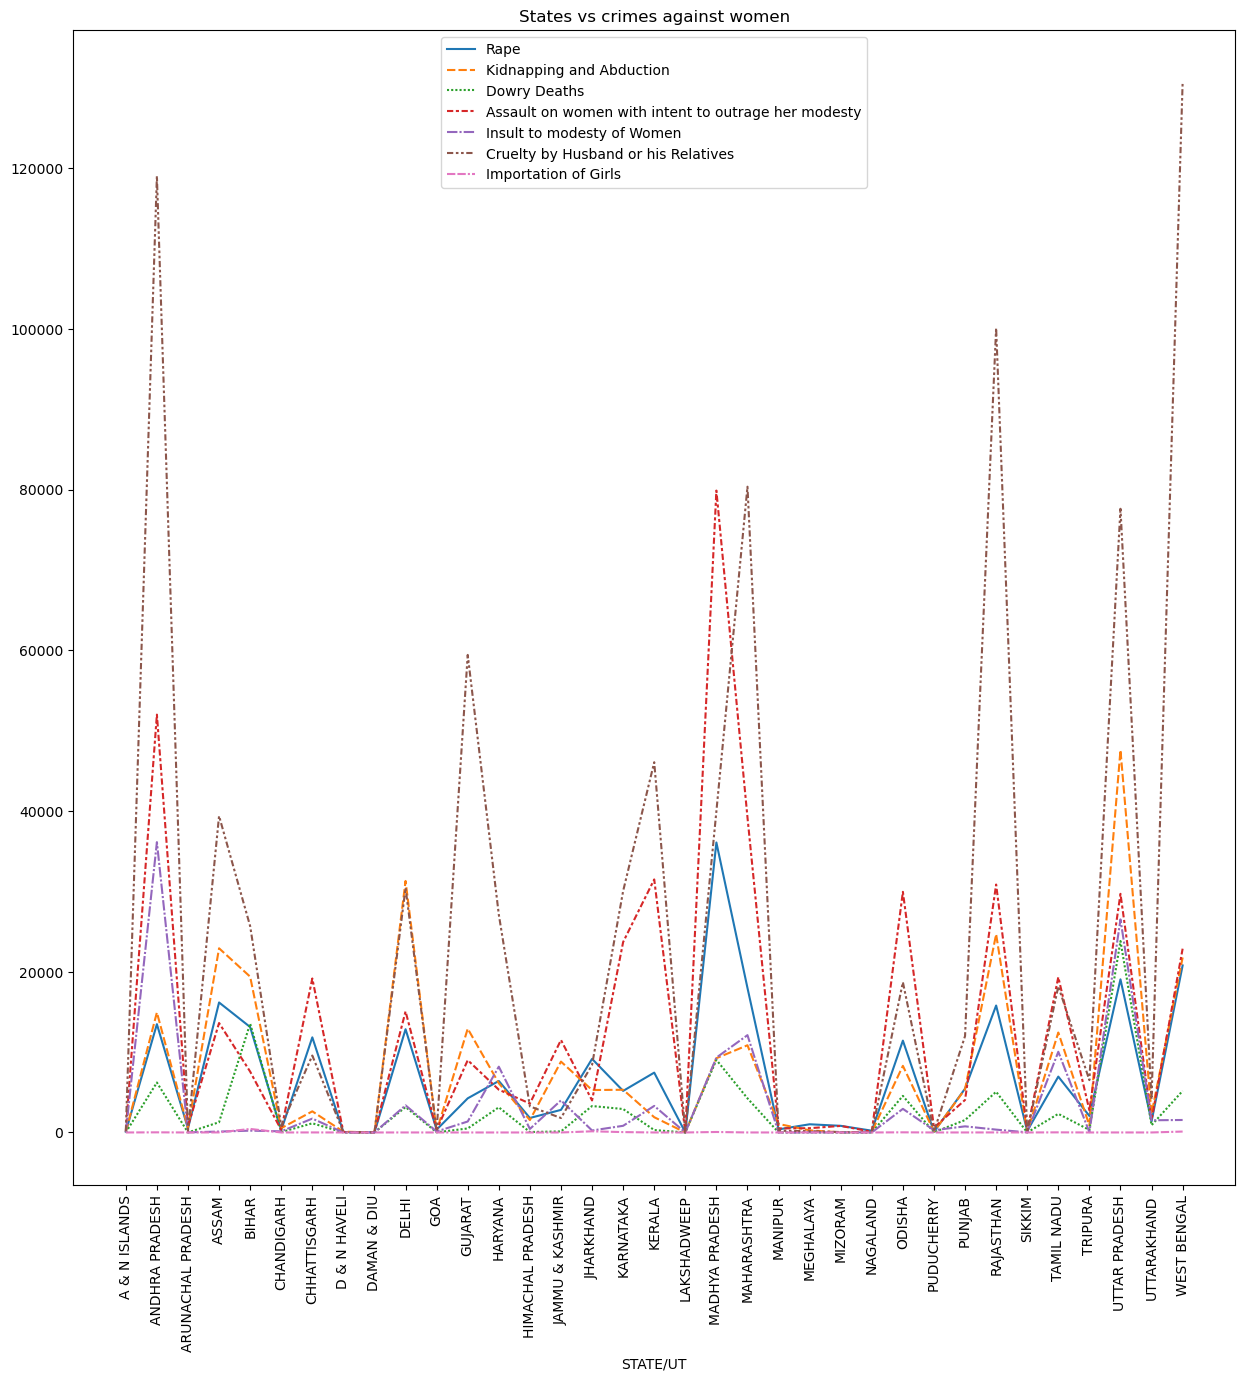

In [60]:
plt.figure(figsize=(15,15))
dt = dff.groupby('STATE/UT')[['Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls']].sum()
sns.lineplot(data = dt)
plt.title('States vs crimes against women')
plt.xticks(rotation = 90)
plt.show()

Cruelty by Husbands and relatives are the most committed ciolent crimes against women in the last decade in india while assault on wmen with intent to outrage her modesty came in the second place and crimes of importations of girls are the lowest committed

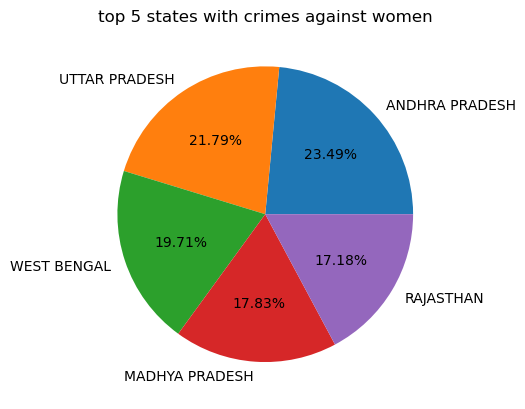

In [62]:
dtt = dff.groupby('STATE/UT')['total crimes'].sum().sort_values(ascending=False).reset_index()[:5]
plt.pie(x=dtt['total crimes'] , labels=dtt['STATE/UT'].unique() , autopct='%0.2f%%')
plt.title('top 5 states with crimes against women')
plt.show()    

ANDHRA PRADESH is the most dangerous state on women in india

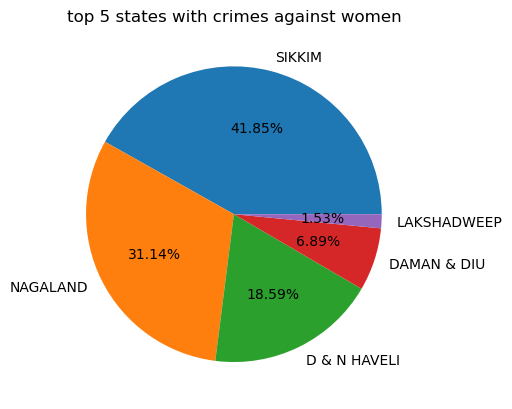

In [64]:
dtt = dff.groupby('STATE/UT')['total crimes'].sum().sort_values(ascending=False).reset_index()[-5:]
plt.pie(x=dtt['total crimes'] , labels=dtt['STATE/UT'].unique() , autopct='%0.2f%%')
plt.title('top 5 states with crimes against women')
plt.show()    

state LAKSHADWEEP is the most safe state for women in india

# 2.3 Analysis of year-on-year total crime rate

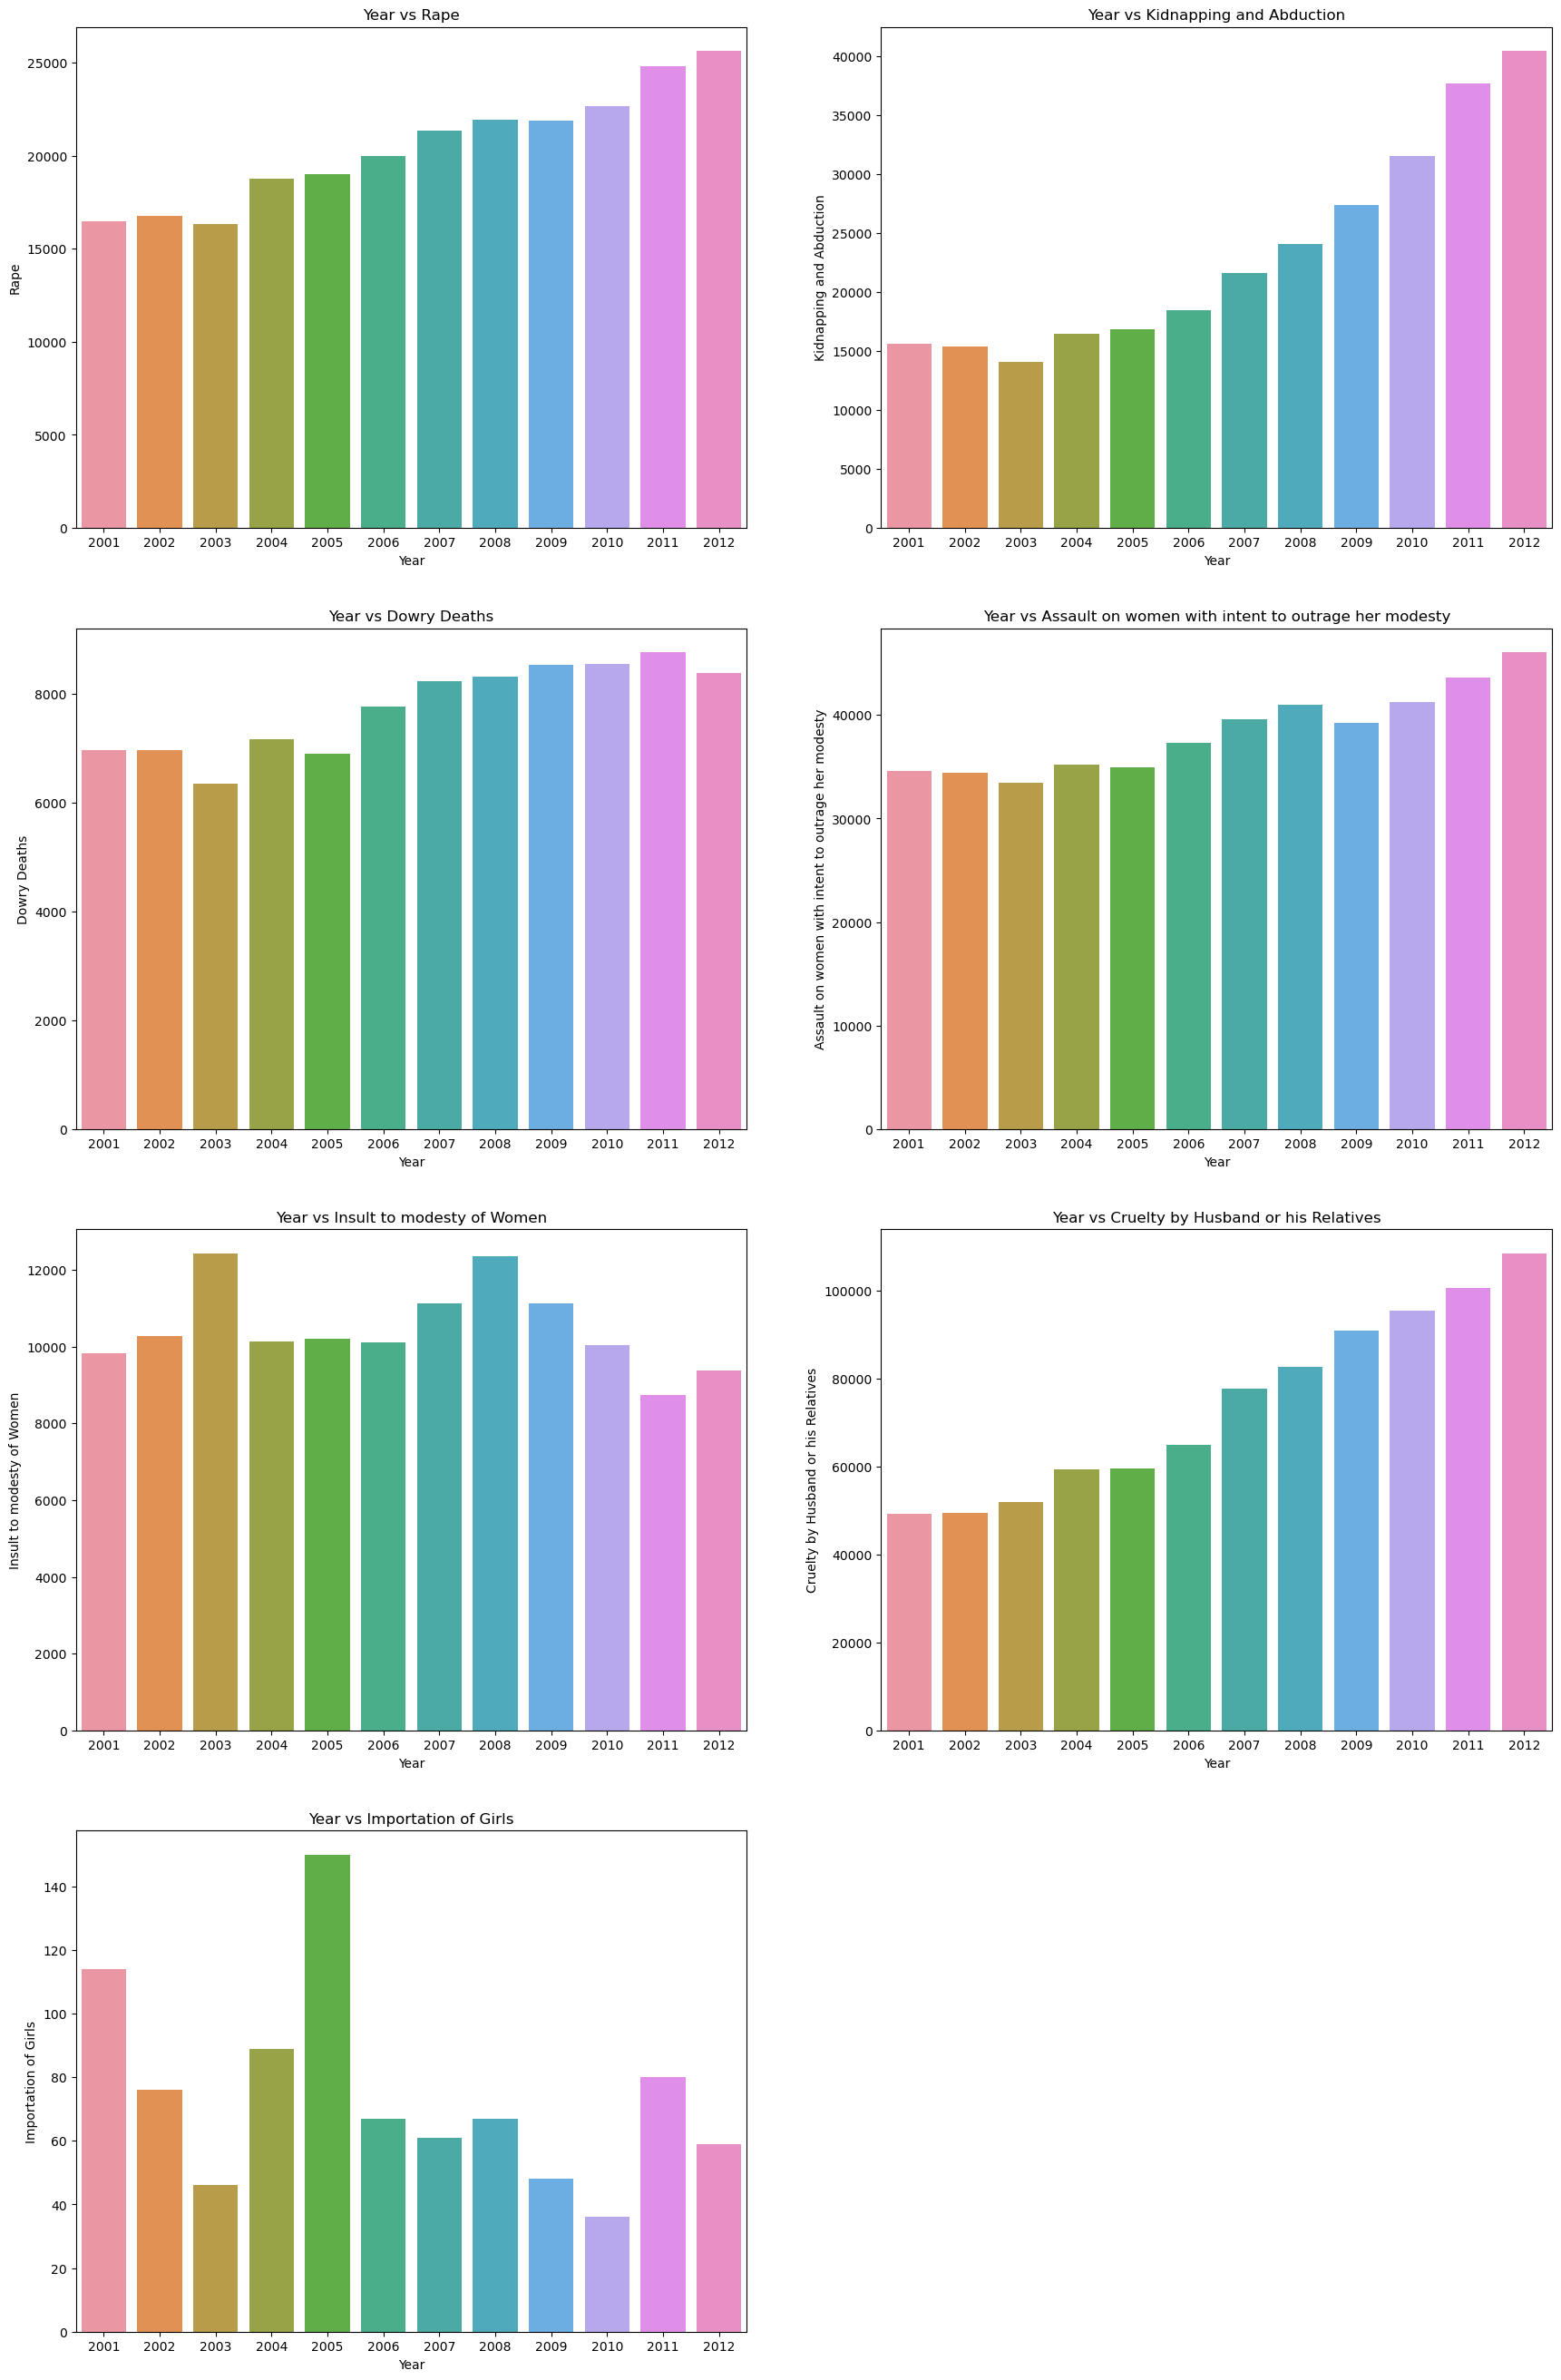

In [65]:
plt.figure(figsize=(21,33))
plot = 1
cols = ['Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls']
for i in cols :
    if plot <= 7 :
        ax = plt.subplot(4,2,plot)
        dtt = dff.groupby('Year')[i].sum().sort_values(ascending=False).reset_index()
        sns.barplot(y=dtt[i] , x=dtt['Year'] , data = dtt)
        plt.title('Year vs {}'.format(i))
    plot +=1
plt.show()    

- 2012 recorded the highest number of rape crimes in india in the last decade while 2003 recorded the least crimes of rape
- 2012 recorded the highest number of Kidnapping and Abduction crimes in in india and 2003 was the least
- 2011 recorded the highest number of dowry death crimes while 2003 was the least
- 2012 recorded the highest number of crimes of Assault on women with intent to outrage her modesty while 2003 witnessed the least number
- 2003 recorded the highest number of crimes of insult women for modesty while 2011 recorded the least
- Domestic violence against women was the highest in india in 2012 while it was the least at the begining of decade
- 2005 recorded the highest activities of illegal imortation and traifficking of girls in india as it recorded more than 140 cases of crimes while 2010 was the lowest

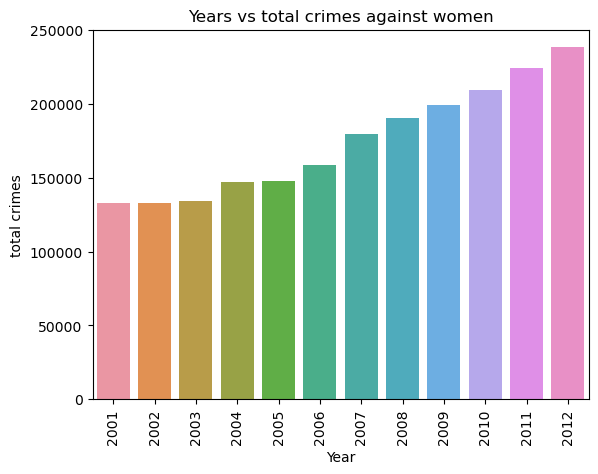

In [66]:
dt = dff.groupby('Year')['total crimes'].sum().sort_values(ascending=False).reset_index()
sns.barplot(y=dt['total crimes'] , x=dt['Year'])
plt.title('Years vs total crimes against women')
plt.xticks(rotation=90)
plt.show()

crimes against women in india increased rapidly in the last decade to reach its peak in 2012 as it mostly was doubled which rings a dangerous alarm to the dangerous environment women are living in in india and must be confronted

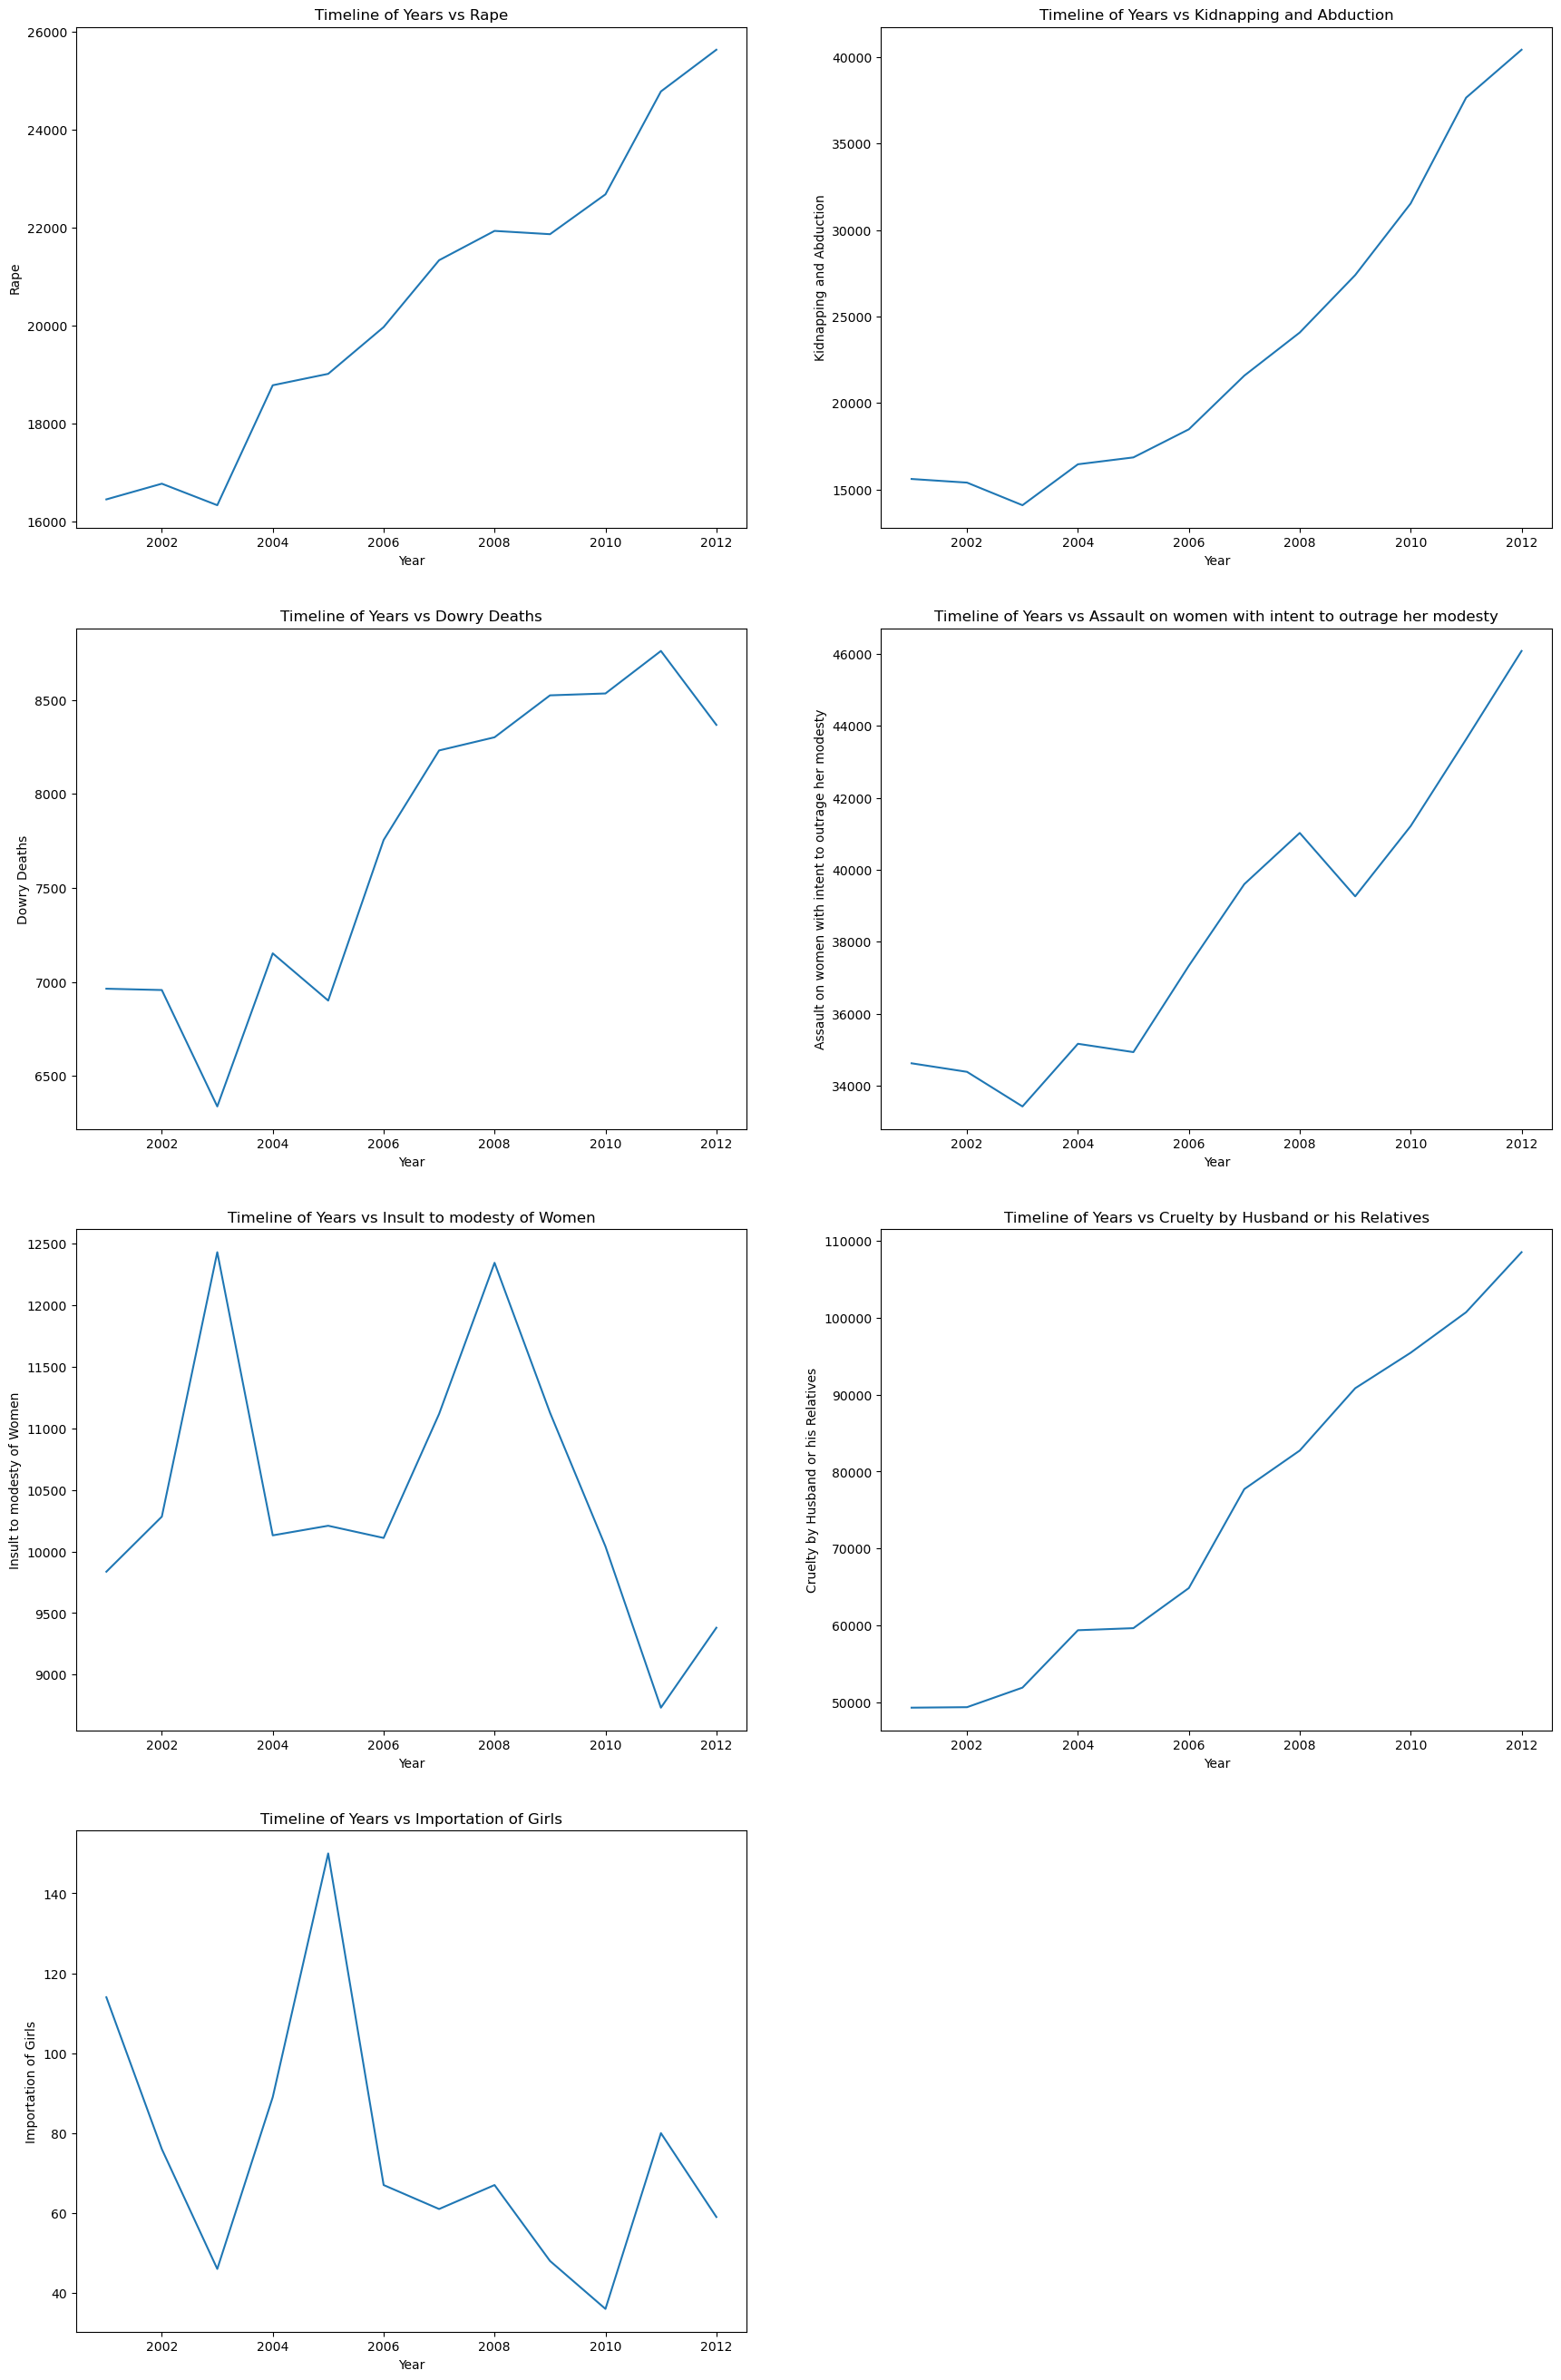

In [67]:
plt.figure(figsize=(21,33))
plot = 1
cols = ['Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls']
for i in cols :
    if plot <= 7 :
        ax = plt.subplot(4,2,plot)
        dtt = dff.groupby('Year')[i].sum()
        sns.lineplot(data = dtt)
        plt.title('Timeline of Years vs {}'.format(i))
    plot +=1
plt.show()    

- Except crimes of importation of girls and insult women for modesty all crimes in india against women were generally increasing in the last decaded which refers to a serious social issues in india and was neglected
- insult women for modesty reaches its peak in 2003 to decrease and return to increase again in 2008
- importation of girls was highly active in 2005 to record its worst records in one of the most dangerous crimes against women but it decreased to lower than 40 cses in 2010 which indicates to the tough effort in confronting this terrible crime

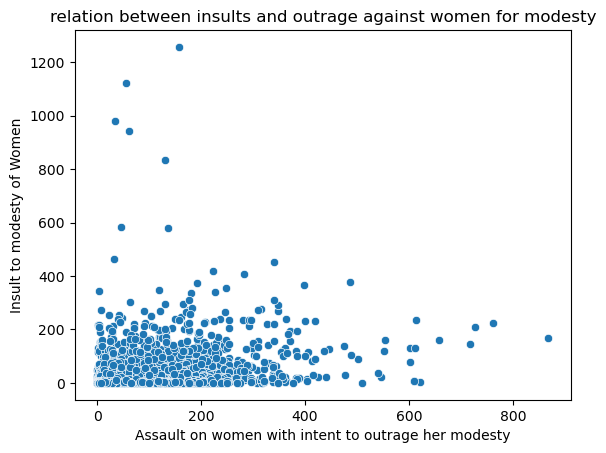

In [70]:
sns.scatterplot(x= dff['Assault on women with intent to outrage her modesty'] , y=dff['Insult to modesty of Women'])
plt.title('relation between insults and outrage against women for modesty')
plt.show()

Assault on women were increasing in india by the decrease of phoenitic insults were decreaing as the harrassers statrted to physically outrage women and that is a serious dangerous phenonmenon in india 

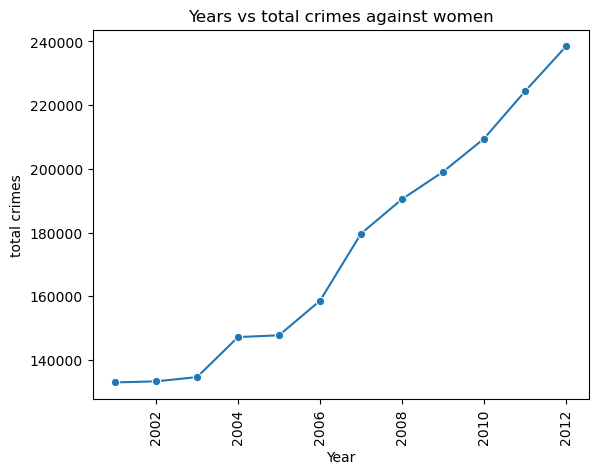

In [73]:
dt = dff.groupby('Year')['total crimes'].sum()
sns.lineplot(data = dt , marker='o')
plt.title('Years vs total crimes against women')
plt.xticks(rotation=90)
plt.show()

crimes against women in india increased rapidly in the last decade to reach its peak in 2012 so we jump to final conclusin that India is a very dangerous place for women and the state is weak in confronting these crimes

# 2.4 Analysis of area vs overall crime

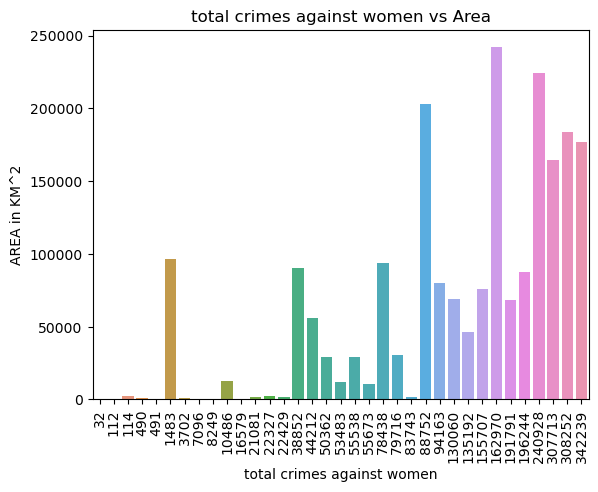

In [74]:
dt = dff.groupby('Area km^2')['total crimes'].sum().sort_values(ascending=False).reset_index()
sns.barplot(y='total crimes' , x='Area km^2' , data=dt)
plt.title('total crimes against women vs Area')
plt.xlabel('total crimes against women')
plt.ylabel('AREA in KM^2')
plt.xticks(rotation=90)
plt.show()

Crimes against women increase highly among most of widen areas above 8000 km^2 where it easy to target the victim and run away depending on the low and weak response of police in a high populated states like india

# 2.5 Analysis of Population vs overall Crime

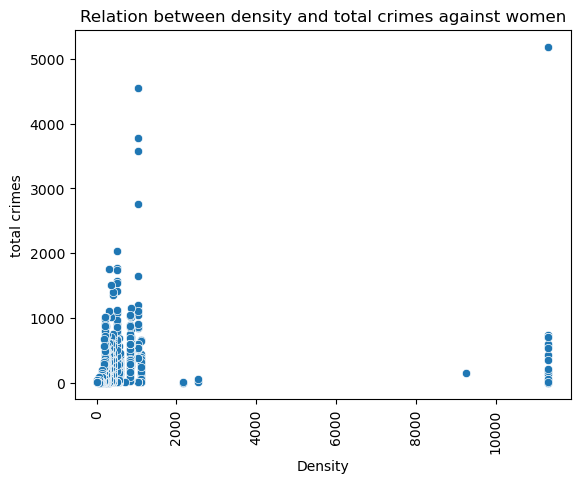

In [75]:
data = dff[dff['Year'] == 2011]
popu = data[['Density','total crimes']].sort_values(by='Density' , ascending=False).reset_index()
sns.scatterplot(x=popu['Density'] , y=popu['total crimes'] )
plt.title('Relation between density and total crimes against women')
plt.xticks(rotation=90)
plt.show()

according to our statistics in year 2011 we summerize that :
- all states in india are very highly populated according to the statndard international density rate (48 persons per Km^2)
-    in year 2011 the majority of crimes against women happened in low populated areas lower than density of 2000 persons per km^2
- some districts in the lower areas according to our label recorded the highest number of crimes against women in 2011 which says the rate of crimes is variable and may increse suddenly or decrease so it is not a major condition that low density or smaller area of districts can prevent high rates of criminality against women in india as the social and fiscal conditions differentiate from a state to another

